In [1]:
# Import all the labriaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data

coffee_raw = pd.read_csv('coffee.csv')
coffee_clean = pd.read_csv('coffee_clean.csv')
coffee_id = pd.read_csv('coffee_id.csv')

# Data Exploration and Quality Check


## Review the Dataset Structure

In [3]:
# Data Overview

print('\n', '='*20, 'Data Overview of coffee_raw', '='*20, '\n')
print(coffee_raw.head())

print('\n', '='*20, 'Data Overview of coffee_clean', '='*20, '\n')
print(coffee_clean.head())

print('\n', '='*20, 'Data Overview of coffee_id', '='*20, '\n')
print(coffee_id.head())


 ==================== Data Overview of coffee_raw ==================== 

                                            all_text  \
0  \n\n\n\n \n93\nFlight Coffee Co.\nEthiopia Der...   
1  \n\n\n\n\n91\nDoi Chaang Coffee\nEspresso\nLoc...   
2  \n\n\n\n \n95\nTemple Coffee and Tea\nKenya Ru...   
3  \n\n\n\n \n93\nTemple Coffee and Tea\nEthiopia...   
4  \n\n\n\n\n93\nChoosy Gourmet\nSpecialty Coffee...   

                              name rating                roaster  \
0            Ethiopia Deri Kochoha     93      Flight Coffee Co.   
1                         Espresso     91      Doi Chaang Coffee   
2           Kenya Ruthaka Peaberry     95  Temple Coffee and Tea   
3        Ethiopia Gora Kone Sidamo     93  Temple Coffee and Tea   
4  Specialty Coffee Blend Espresso     93         Choosy Gourmet   

                                      slug  region_africa_arabia  \
0          /review/ethiopia-deri-kochoha-2                     1   
1                      /review/espresso-14  

In [4]:
# Data Information

print('\n', '='*10, 'Data Information of coffee_raw', '='*10, '\n')
coffee_raw.info()
print('\n', '='*10, 'Data Information of coffee_clean', '='*10, '\n')
coffee_clean.info()
print('\n', '='*10, 'Data Information of coffee_id', '='*10, '\n')
coffee_id.info()


 ========== Data Information of coffee_raw ========== 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   all_text                5124 non-null   object 
 1   name                    5124 non-null   object 
 2   rating                  5124 non-null   object 
 3   roaster                 5124 non-null   object 
 4   slug                    5124 non-null   object 
 5   region_africa_arabia    5124 non-null   int64  
 6   region_caribbean        5124 non-null   int64  
 7   region_central_america  5124 non-null   int64  
 8   region_hawaii           5124 non-null   int64  
 9   region_asia_pacific     5124 non-null   int64  
 10  region_south_america    5124 non-null   int64  
 11  type_espresso           5124 non-null   int64  
 12  type_organic            5124 non-null   int64  
 13  type_fair_trade         5124 non-nul

In [5]:
# Statistical summary

print('\n', '='*20, 'Statistical Summary', '='*20, '\n')

print('\n', '='*10, 'Statistical Summary of coffee_raw', '='*10, '\n')
print(coffee_raw.describe(include='all'))

print('\n', '='*10, 'Statistical Summary of coffee_clean', '='*10, '\n')
print(coffee_clean.describe(include='all'))

print('\n', '='*10, 'Statistical Summary of coffee_id', '='*10, '\n')
print(coffee_id.describe(include='all'))


 ==================== Statistical Summary ==================== 


 ========== Statistical Summary of coffee_raw ========== 

                                                 all_text           name  \
count                                                5124           5124   
unique                                               5124           4232   
top     \n\n\n\n \n93\nFlight Coffee Co.\nEthiopia Der...  Holiday Blend   
freq                                                    1             25   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                   

In [6]:
# Checking common columns acress datasets

print('\n', '='*20, 'Common columns across datasets', '='*20, '\n')

common_column_coffee_raw_coffee_id = set(coffee_raw.columns).intersection(coffee_id.columns)
print(f'\nCommon Columns in coffee_raw and coffee_id:\n{common_column_coffee_raw_coffee_id}')

common_column_coffee_clean_coffee_id = set(coffee_clean.columns).intersection(coffee_id.columns)
print(f'\nCommon Columns in coffee_clean and coffee_id:\n{common_column_coffee_clean_coffee_id}')

common_column_coffee_raw_coffee_clean = set(coffee_raw.columns).intersection(coffee_clean.columns)
print(f'\nCommon Columns in coffee_raw and coffee_clean:\n{common_column_coffee_raw_coffee_clean}')


 ==================== Common columns across datasets ==================== 


Common Columns in coffee_raw and coffee_id:
{'slug', 'review_date', 'name', 'roaster', 'rating'}

Common Columns in coffee_clean and coffee_id:
{'slug'}

Common Columns in coffee_raw and coffee_clean:
{'slug', 'region_hawaii', 'type_estate', 'type_decaffeinated', 'type_pod_capsule', 'region_central_america', 'aroma', 'flavor', 'type_fair_trade', 'region_south_america', 'type_organic', 'type_espresso', 'region_asia_pacific', 'region_africa_arabia', 'body', 'type_blend', 'region_caribbean'}


In [7]:
# Veryfing unique indentifires

print('\n', '='*20, 'Verify unique identifiers', '='*20, '\n')

print('\n', '='*10, 'Slugs', '='*10, '\n')
print(f"\nSlug in Coffee_raw \n{coffee_raw['slug']}")
print(f"\nSlug in Coffee_clean \n{coffee_clean['slug']}")
print(f"\nSlug in Coffee_id \n{coffee_id['slug']}")

print('\n', '='*10, 'Name', '='*10, '\n')
print(f"\nname in Coffee_raw \n{coffee_raw['name']}")
print(f"\nname in Coffee_id \n{coffee_id['name']}")

print('\n', '='*10, 'Review Date', '='*10, '\n')
print(f"\nreview_date in Coffee_raw \n{coffee_raw['review_date']}")
print(f"\nreview_date in Coffee_id \n{coffee_id['review_date']}")


 ==================== Verify unique identifiers ==================== 


 ========== Slugs ========== 


Slug in Coffee_raw 
0               /review/ethiopia-deri-kochoha-2
1                           /review/espresso-14
2                /review/kenya-ruthaka-peaberry
3             /review/ethiopia-gora-kone-sidamo
4       /review/specialty-coffee-blend-espresso
                         ...                   
5119                      /review/beanery-blend
5120                        /review/house-blend
5121           /review/presidents-private-blend
5122                  /review/traditional-roast
5123                      /review/special-roast
Name: slug, Length: 5124, dtype: object

Slug in Coffee_clean 
0               ethiopia-deri-kochoha-2
1                           espresso-14
2                kenya-ruthaka-peaberry
3             ethiopia-gora-kone-sidamo
4       specialty-coffee-blend-espresso
                     ...               
4882                      beanery-blend
4883

## Identify Data Issues 

In [8]:
# Checking for missing values

print('\n', '='*10, 'Missing values across datasets', '='*10, '\n')

print(f"\ncoffee_raw Missing Values: \n{coffee_raw.isnull().sum()}")
print(f"\ncoffee_clean Missing Values: \n{coffee_clean.isnull().sum()}")
print(f"\ncoffee_id Missing Values: \n{coffee_id.isnull().sum()}")


 ========== Missing values across datasets ========== 


coffee_raw Missing Values: 
all_text                     0
name                         0
rating                       0
roaster                      0
slug                         0
region_africa_arabia         0
region_caribbean             0
region_central_america       0
region_hawaii                0
region_asia_pacific          0
region_south_america         0
type_espresso                0
type_organic                 0
type_fair_trade              0
type_decaffeinated           0
type_pod_capsule             0
type_blend                   0
type_estate                  0
location                     2
origin                     595
roast                      428
est_price                 2110
review_date                  0
agtron                       0
aroma                       39
acid                       868
body                        13
flavor                      18
aftertaste                1013
with_milk      

In [9]:
# Checking ratings and review_date

print('\n', '='*10, 'Checking ratings and review_date', '='*10, '\n')

print(f"\nRatings: \n{coffee_id['rating'].unique()}")
print(f"\nReview Date: \n{coffee_id['review_date'].unique()}")


 ========== Checking ratings and review_date ========== 


Ratings: 
['93' '91' '95' '94' '97' '92' '96' '90' '88' '83' '72' '89' '68' '63'
 '86' '84' '67' '87' '75' '85' '80' '79' '77' '82' '71' '73' '74' '78'
 '76' '66' '69' '81' '65' '70' 'NR' '60']

Review Date: 
['2019-01-01' '2018-12-01' '2018-11-01' '2018-10-01' '2018-09-01'
 '2018-08-01' '2018-07-01' '2018-06-01' '2018-05-01' '2018-04-01'
 '2018-03-01' '2018-02-01' '2018-01-01' '2017-12-01' '2017-11-01'
 '2017-10-01' '2017-09-01' '2017-08-01' '2017-07-01' '2017-06-01'
 '2017-05-01' '2017-04-01' '2017-03-01' '2017-02-01' '2017-01-01'
 '2016-12-01' '2016-11-01' '2016-10-01' '2016-09-01' '2016-08-01'
 '2016-07-01' '2016-06-01' '2016-05-01' '2016-04-01' '2016-03-01'
 '2016-02-01' '2016-01-01' '2015-12-01' '2015-11-01' '2015-10-01'
 '2015-09-01' '2015-08-01' '2015-07-01' '2015-06-01' '2015-05-01'
 '2015-04-01' '2015-03-01' '2015-02-01' '2015-01-01' '2014-12-01'
 '2014-11-01' '2014-10-01' '2014-09-01' '2014-08-01' '2014-07-01'
 '201

In [10]:
# Veryfing duplicated rows across datasets

print('\n', '='*10, 'Duplicated rows across datasets', '='*10, '\n')

print(f"coffee_raw Duplicated Values: {coffee_raw.duplicated().sum()}")
print(f"\ncoffee_clean Duplicated Values: {coffee_clean.duplicated().sum()}")
print(f"\ncoffee_id Duplicated Values: {coffee_id.duplicated().sum()}")


 ========== Duplicated rows across datasets ========== 

coffee_raw Duplicated Values: 0

coffee_clean Duplicated Values: 0

coffee_id Duplicated Values: 0


In [11]:
# Veryfing duplicated entries in slug or name 

print('\n', '='*10, 'Duplicated slugs/names across datasets', '='*10, '\n')


print(f"\ncoffe_raw Duplicated Slug Values: {coffee_raw['slug'].duplicated().sum()}")
print(f"\ncoffee_clean Duplicated Slug Values: {coffee_clean['slug'].duplicated().sum()}")
print(f"\ncoffee_id Duplicated Slug Values: {coffee_id['slug'].duplicated().sum()}")

print(f"\n\ncoffee_raw Duplicated name Values: {coffee_raw['name'].duplicated().sum()}")
print(f"\ncoffee_id Duplicated name Values: {coffee_id['name'].duplicated().sum()}")


 ========== Duplicated slugs/names across datasets ========== 


coffe_raw Duplicated Slug Values: 0

coffee_clean Duplicated Slug Values: 0

coffee_id Duplicated Slug Values: 0


coffee_raw Duplicated name Values: 892

coffee_id Duplicated name Values: 816


In [12]:
# Veryfing Inconsistencies in categorical value

print('\n', '='*10, 'Inconsistencies in categorical value', '='*10, '\n')

print(f"\nRoast Types: {coffee_raw['roast'].unique()}")

print(f"\nRegions in coffe_raw:\n{coffee_raw[['region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america']].nunique()}")
print(f"\nRegions in coffe_clean:\n{coffee_clean[['region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america']].nunique()}")
print(f"\nTypes in coffe_clean\n{coffee_clean[['type_espresso', 'type_organic', 'type_fair_trade', 'type_decaffeinated', 'type_pod_capsule', 'type_blend', 'type_estate', 'type_with_milk.1']].nunique()}")

print(f"\nRegions in coffe_raw:\n{coffee_raw[['region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america']].head(5)}")
print(f"\nRegions in coffe_clean:\n{coffee_clean[['region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america']].head(5).head(5)}")
print(f"\nTypes in coffe_clean\n{coffee_clean[['type_espresso', 'type_organic', 'type_fair_trade', 'type_decaffeinated', 'type_pod_capsule', 'type_blend', 'type_estate', 'type_with_milk.1']].head(5)}")

print(f"\nSlug in Coffee_raw \n{coffee_raw['slug'].head(10)}")


 ========== Inconsistencies in categorical value ========== 


Roast Types: ['Medium-Light' 'Medium' 'Light' nan 'Medium-Dark' 'Very Dark' 'Dark']

Regions in coffe_raw:
region_africa_arabia      2
region_caribbean          2
region_central_america    2
region_hawaii             2
region_asia_pacific       2
region_south_america      2
dtype: int64

Regions in coffe_clean:
region_africa_arabia      2
region_caribbean          2
region_central_america    2
region_hawaii             2
region_asia_pacific       2
region_south_america      2
dtype: int64

Types in coffe_clean
type_espresso         2
type_organic          2
type_fair_trade       2
type_decaffeinated    2
type_pod_capsule      2
type_blend            2
type_estate           2
type_with_milk.1      2
dtype: int64

Regions in coffe_raw:
   region_africa_arabia  region_caribbean  region_central_america  \
0                     1                 0                       0   
1                     0                 0             

In [13]:
# Checking origin in coffee_raw

print(coffee_raw['origin'].head(20))

0     West Guji Zone, Oromia Region, southeastern Et...
1                                     Northern Thailand
2             Nyeri growing region, south-central Kenya
3     Sidamo (also Sidama) growing region, south-cen...
4                             Ethiopia, Colombia, Kenya
5                               Santa Bárbara, Honduras
6     Kalehe, South Kivu Province, Democratic Republ...
7     Cerrado Mineiro growing region, Santa Luzia, B...
8                               Santa Bárbara, Honduras
9     Yirgacheffe growing region, south-central Ethi...
10                Chiriqui Province, far western Panama
11                          Tolima Department, Colombia
12                                      Huila, Colombia
13                        Jutiapa Department, Guatemala
14    Alaka District, Guji Zone, Oromia region, sout...
15                         Guji Zone, southern Ethiopia
16            Nyeri growing region, south-central Kenya
17                       São Sebastião de Grama,

In [14]:
# Checking roast in coffee_raw

print(coffee_raw['roast'].head(20))

0     Medium-Light
1           Medium
2           Medium
3     Medium-Light
4     Medium-Light
5     Medium-Light
6     Medium-Light
7     Medium-Light
8     Medium-Light
9     Medium-Light
10    Medium-Light
11    Medium-Light
12    Medium-Light
13    Medium-Light
14    Medium-Light
15    Medium-Light
16    Medium-Light
17    Medium-Light
18    Medium-Light
19    Medium-Light
Name: roast, dtype: object


# Data Cleaning and Transformation


In [15]:
# Fixing the slug in coffee_raw

coffee_raw['slug'] = coffee_raw['slug'].str.replace('/review/', '', regex=False)

In [16]:
# Merging dataframes of coffee_clean and coffee_id

merged_data = coffee_clean.merge(coffee_id, on="slug", how="inner")

In [17]:
# List of column names that are in coffee_raw but not in merged_data 

extra_columns = coffee_raw.columns.difference(merged_data.columns).tolist()
print(extra_columns) 

['acid', 'aftertaste', 'agtron', 'all_text', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'est_price', 'location', 'origin', 'roast', 'with_milk']


In [18]:
# Merging merged_data with selected columns from coffee_raw on the slug column

extra_columns = ['slug', 'acid', 'aftertaste', 'agtron', 'all_text', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'est_price', 'location', 'origin', 'roast', 'with_milk']

cleaned_data = merged_data.merge(coffee_raw[extra_columns], on="slug", how="left")
cleaned_data.head()

,slug,aroma,acid_or_milk,body,flavor,type_with_milk,clean_text,roast_dark,roast_light,roast_medium,...,all_text,desc_1,desc_2,desc_3,desc_4,est_price,location,origin,roast,with_milk
0,ethiopia-deri-kochoha-2,9.0,8.0,9.0,9.0,0,bright crisp sweetli tart citru medley cacao n...,0,0,0,...,\n\n\n\n \n93\nFlight Coffee Co.\nEthiopia Der...,"Bright, crisp, sweetly tart. Citrus medley, ca...",From the Deri Kochoha mill in the Hagere Marya...,A poised and melodic wet-processed Ethiopia co...,NaN,$17.00/12 ounces,"Bedford, New Hampshire","West Guji Zone, Oromia Region, southeastern Et...",Medium-Light,NaN
1,espresso-14,8.0,9.0,8.0,8.0,1,evalu espresso deepli rich sweetli roast round...,0,0,1,...,\n\n\n\n\n91\nDoi Chaang Coffee\nEspresso\nLoc...,"Evaluated as espresso. Deeply rich, sweetly ro...",Doi Chaang is a single-estate coffee produced ...,"A rich, resonant espresso from Thailand, espec...",NaN,CAD $29.99/32 ounces,"Richmond, British Columbia, Canada",Northern Thailand,Medium,9.0
2,kenya-ruthaka-peaberry,9.0,8.0,9.0,10.0,0,deepli sweet richli savori dark chocol pistach...,0,0,1,...,\n\n\n\n \n95\nTemple Coffee and Tea\nKenya Ru...,"Deeply sweet, richly savory. Dark chocolate, p...",Despite challenges ranging from contested gove...,"A high-toned, nuanced Kenya cup, classic in it...",NaN,$19.00/12 ounces,"Sacramento, California","Nyeri growing region, south-central Kenya",Medium,NaN
3,ethiopia-gora-kone-sidamo,9.0,8.0,9.0,9.0,0,fruit forward richli chocolati raspberri couli...,0,0,0,...,\n\n\n\n \n93\nTemple Coffee and Tea\nEthiopia...,"Fruit-forward, richly chocolaty. Raspberry cou...",Southern Ethiopia coffees like this one are la...,"A playful, unrestrained fruit bomb of a coffee...",NaN,$20.00/12 ounces,"Sacramento, California","Sidamo (also Sidama) growing region, south-cen...",Medium-Light,NaN
4,specialty-coffee-blend-espresso,9.0,9.0,8.0,9.0,1,evalu espresso rich chocolati sweetli tart dar...,0,0,0,...,\n\n\n\n\n93\nChoosy Gourmet\nSpecialty Coffee...,"Evaluated as espresso. Rich, chocolaty, sweetl...",A blend of coffees from Ethiopia (natural-proc...,An espresso blend in which spice notes — in pa...,NaN,NT $250/16 ounces,"Kaohsiung, Taiwan","Ethiopia, Colombia, Kenya",Medium-Light,9.0


In [19]:
# Data information

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   slug                    4887 non-null   object 
 1   aroma                   4887 non-null   float64
 2   acid_or_milk            4887 non-null   float64
 3   body                    4887 non-null   float64
 4   flavor                  4887 non-null   float64
 5   type_with_milk          4887 non-null   int64  
 6   clean_text              4887 non-null   object 
 7   roast_dark              4887 non-null   int64  
 8   roast_light             4887 non-null   int64  
 9   roast_medium            4887 non-null   int64  
 10  roast_medium_dark       4887 non-null   int64  
 11  roast_medium_light      4887 non-null   int64  
 12  roast_very_dark         4887 non-null   int64  
 13  roast_nan               4887 non-null   int64  
 14  region_africa_arabia    4887 non-null   

## Handle Missing Data

In [20]:
# Dropping non-essential columns

cleaned_data = cleaned_data.drop(columns=['all_text', 'desc_3', 'desc_4', 'est_price', 'with_milk'])

In [21]:
# Checking if the columns type_with_milk and type_with_milk.1 in cleaned_data are identical

are_identical = cleaned_data['type_with_milk'].equals(cleaned_data['type_with_milk.1'])
print(are_identical) 

True


In [22]:
# Dropping one of the columns

cleaned_data = cleaned_data.drop(columns=['type_with_milk.1'])

In [23]:
# Mapping region indicator columns to region names

region_mapping = {
    'region_africa_arabia': 'Africa Arabia',
    'region_caribbean': 'Caribbean',
    'region_central_america': 'Central America',
    'region_hawaii': 'Hawaii',
    'region_asia_pacific': 'Asia Pacific',
    'region_south_america': 'South America'
}

def get_region(row):
    for col, region_name in region_mapping.items():
        if row[col] == 1:  
            return region_name
    return 'Unknown' 

cleaned_data['region'] = cleaned_data.apply(get_region, axis=1)

print(cleaned_data[['region']].value_counts())
print(cleaned_data[['region']].count())

region         
Unknown            2064
Africa Arabia      1107
Central America     806
South America       407
Asia Pacific        361
Hawaii              100
Caribbean            42
Name: count, dtype: int64
region    4887
dtype: int64


In [24]:
# Updating the region column by mapping unknown regions based on keywords found in the 'origin' column

def map_region_from_text(row):
    africa_arabia_keywords = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 
    'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 
    'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 
    'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 
    'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 
    'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 
    'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 
    'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 
    'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Africa', 'Arabia'
]
    
    asia_and_pacific_keywords = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 
    'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 
    'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 
    'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 
    'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 
    'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 
    'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 
    'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 
    'Vietnam', 'Yemen', 'Taiwan', 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 
    'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Timor', 'Sumatra', 'Asia', 'Pacific'
]
    south_america_keywords = [
    'Colombia', 'Brazil', 'Peru', 'Ecuador', 'Honduras', 'Bolivia', 
    'Argentina', 'Chile', 'Paraguay', 'Uruguay', 'Venezuela', 'Guyana', 
    'Suriname', 'South America', 'Latin America'
]

    central_america_keywords = [
    'Costa Rica', 'Panama', 'Guatemala', 'Mexico', 'El Salvador', 'Nicaragua', 'Belize', 'Central America'
]

    caribbean_keywords = [
    'Puerto Rico', 'Jamaica', 'Dominican Republic', 'Haiti', 'Cuba', 
    'Barbados', 'Saint Lucia', 'Saint Vincent and the Grenadines', 
    'Trinidad and Tobago', 'Antigua and Barbuda', 'Saint Kitts and Nevis', 
    'Grenada', 'Bahamas', 'Aruba', 'Cayman Islands', 'Bermuda', 'French Guiana'
]
    
    hawaii_keywords = ['Hawaii']

    if row['region'] == 'Unknown':  
        if isinstance(row['origin'], str):
            if any(keyword in row['origin'] for keyword in africa_arabia_keywords):
                return 'Africa Arabia'
            elif any(keyword in row['origin'] for keyword in asia_and_pacific_keywords):
                return 'Asia Pacific'
            elif any(keyword in row['origin'] for keyword in south_america_keywords):
                return 'South America'
            elif any(keyword in row['origin'] for keyword in caribbean_keywords):
                return 'Caribbean'
            elif any(keyword in row['origin'] for keyword in central_america_keywords):
                return 'Central America'
            elif any(keyword in row['origin'] for keyword in hawaii_keywords):
                return 'Hawaii'
    return row['region']
cleaned_data['region'] = cleaned_data.apply(map_region_from_text, axis=1)
print(cleaned_data['region'].value_counts())
print(cleaned_data[['region']].count())

region
Africa Arabia      1662
Central America    1106
Unknown             693
South America       688
Asia Pacific        543
Hawaii              136
Caribbean            59
Name: count, dtype: int64
region    4887
dtype: int64


In [25]:
# Cleaning roaster

cleaned_data['roaster'] = cleaned_data['roaster'].str.strip().str.lower()

In [26]:
# Filling 'Unknown' regions based on the most common region per roaster

roaster_to_region = cleaned_data[cleaned_data['region'] != 'Unknown'].groupby('roaster')['region'].agg(lambda x: x.mode()[0])
cleaned_data.loc[cleaned_data['region'] == 'Unknown', 'region'] = cleaned_data['roaster'].map(roaster_to_region).fillna('Unknown')

print(cleaned_data['region'].value_counts())
print(cleaned_data[['region']].count())

region
Africa Arabia      1871
Central America    1193
South America       721
Asia Pacific        640
Unknown             254
Hawaii              144
Caribbean            64
Name: count, dtype: int64
region    4887
dtype: int64


In [27]:
# Filling 'Unknown' regions based on the most common region per location

location_to_region = cleaned_data[cleaned_data['region'] != 'Unknown'].groupby('location')['region'].agg(lambda x: x.mode()[0])
cleaned_data.loc[cleaned_data['region'] == 'Unknown', 'region'] = cleaned_data['location'].map(location_to_region).fillna('Unknown')

print(cleaned_data['region'].value_counts())
print(cleaned_data[['region']].count())

region
Africa Arabia      1914
Central America    1204
South America       733
Asia Pacific        669
Unknown             158
Hawaii              145
Caribbean            64
Name: count, dtype: int64
region    4887
dtype: int64


In [28]:
# Filling missing values as 'Unknown'

cleaned_data['origin'].fillna('Unknown', inplace=True)
cleaned_data['location'].fillna('Unknown', inplace=True)

In [29]:
# Dropping encoded region columns

cleaned_data = cleaned_data.drop(columns=['region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america'])

In [30]:
# Replacing 'Very Dark' with 'Very-Dark' and fills missing roast values with 'Unknown'

cleaned_data['roast'] = cleaned_data['roast'].replace('Very Dark', 'Very-Dark').fillna('Unknown')

print(cleaned_data['roast'].value_counts())
print(cleaned_data['roast'].count())

roast
Medium-Light    1661
Medium          1354
Medium-Dark      764
Light            418
Unknown          371
Dark             216
Very-Dark        103
Name: count, dtype: int64
4887


In [31]:
# Filling 'Unknown' values in the roast column based on the most popular roast for each region

popular_roast_per_region = cleaned_data[cleaned_data['roast'] != 'Unknown'].groupby('region')['roast'].agg(lambda x: x.mode()[0])

cleaned_data.loc[cleaned_data['roast'] == 'Unknown', 'roast'] = cleaned_data['region'].map(popular_roast_per_region)

print(cleaned_data['roast'].value_counts())
print(cleaned_data['roast'].count())

roast
Medium-Light    1878
Medium          1427
Medium-Dark      845
Light            418
Dark             216
Very-Dark        103
Name: count, dtype: int64
4887


In [32]:
# Dropping encoded roast columns

cleaned_data = cleaned_data.drop(columns=['roast_dark', 'roast_light', 'roast_medium', 'roast_medium_dark', 'roast_medium_light', 'roast_very_dark', 'roast_nan'])

In [33]:
# Mapping type indicator columns to type names

type_mapping = {
    'type_espresso': 'espresso',
    'type_organic': 'organic',
    'type_fair_trade': 'fair trade',
    'type_decaffeinated': 'decaffeinated',
    'type_pod_capsule': 'pod capsule',
    'type_blend': 'blend',
    'type_estate': 'estate',
    'type_with_milk': 'with milk'
}

def get_type(row):
    for col, type_name in type_mapping.items():
        if row[col] == 1:  
            return type_name
    return 'Unknown' 

cleaned_data['type'] = cleaned_data.apply(get_type, axis=1)

print(cleaned_data[['type']].value_counts())
print(cleaned_data[['type']].count())

type         
Unknown          2851
espresso          666
estate            574
organic           387
blend             179
pod capsule       109
fair trade         56
decaffeinated      34
with milk          31
Name: count, dtype: int64
type    4887
dtype: int64


In [34]:
# Updating the type column by mapping unknown types based on keywords found in the 'desc_1' and 'desc_2' columns

def map_type_from_text(row):
    espresso_keywords = [
    'espresso', 'espresso roast', 'strong coffee', 'dark roast', 'ristretto', 
    'doppio', 'short black', 'long black', 'intense coffee', 'italian roast', 
    'full-bodied', 'bold coffee', 'high-intensity', 'robust coffee', 'strong', 'intense',
    'deep roast', 'powerful roast', 'extra dark', 'turbo shot', 'midnight roast'
]

    estate_keywords = [
    'estate', 'single origin', 'exclusive estate', 'specialty coffee', 
    'microlot', 'limited edition', 'direct trade', 'farm-to-cup', 
    'private estate', 'regional selection', 'terroir coffee', 'exclusive', 'specialty',
    'origin select', 'handcrafted', 'small-batch', 'private reserve', 'artisan farm'
]

    organic_keywords = [
    'organic', 'bio', 'eco-friendly', 'certified organic', 'natural coffee', 
    'biodynamic', 'chemical-free', 'sustainable farm', 'shade-grown', 
    'wild-grown', 'no pesticides', 'handpicked', 'natural', 'earth-friendly', 
    'pure coffee', 'non-GMO', 'green certified', 'organic beans', 'soil-friendly'
]

    blend_keywords = [
    'blend', 'house blend', 'signature blend', 'special blend', 'barista blend', 
    'classic blend', 'artisan blend', 'balanced roast', 'custom blend', 
    'all-purpose blend', 'breakfast blend', 'medium-dark blend',
    'fusion roast', 'flavorful mix', 'harmonized roast', 'smooth blend', 'complex blend'
]

    pod_capsule_keywords = [
    'pod capsule', 'pod_capsule', 'coffee pod', 'capsule coffee', 'single-serve', 
    'compatible capsule', 'nespresso pod', 'k-cup', 'keurig pod', 'dolce gusto pod', 
    'tassimo pod', 'keurig-compatible', 'easy serving espresso', 'E.S.E pod', 'capsule', 'pod',
    'one-cup', 'quick brew', 'easy brew', 'fast coffee', 'machine-friendly'
]

    fair_trade_keywords = [
    'fair trade', 'fair_trade', 'ethical trade', 'fairly traded', 'sustainable coffee', 
    'responsibly sourced', 'fair wage', 'rainforest alliance', 'UTZ certified', 
    'direct trade', 'social impact coffee', 'people-first coffee', 'fair', 'trade',
    'equitable sourcing', 'human-first', 'eco-conscious', 'better future', 'community coffee'
]

    decaffeinated_keywords = [
    'decaffeinated', 'decaf', 'caffeine-free', 'low caffeine', 'half-caf', 
    'water process decaf', 'swiss water process', 'chemical-free decaf', 
    'naturally decaffeinated', 'mellow decaf', 'smooth decaf',
    'zero caffeine', 'night-friendly', 'late-night coffee', 'relaxing brew', 'gentle coffee'
]

    with_milk_keywords = [
    'with milk', 'latte', 'cappuccino', 'milk-based', 'flat white', 
    'macchiato', 'mocha', 'creamy coffee', 'steamed milk', 'frothy milk', 
    'white coffee', 'milky espresso', 'coffee with cream', 'milk', 'milky',
    'velvety texture', 'buttery smooth', 'frothy delight', 'rich foam', 'soft crema'
]
    
    if row['type'] == 'Unknown':  
        if isinstance(row['desc_2'], str):
            desc_text = (str(row['desc_1']) + " " + str(row['desc_2'])).lower() 
            if any(keyword in desc_text for keyword in espresso_keywords):
                return 'espresso'
            elif any(keyword in desc_text for keyword in estate_keywords):
                return 'estate'
            elif any(keyword in desc_text for keyword in organic_keywords):
                return 'organic'
            elif any(keyword in desc_text for keyword in blend_keywords):
                return 'blend'
            elif any(keyword in desc_text for keyword in pod_capsule_keywords):
                return 'pod capsule'
            elif any(keyword in desc_text for keyword in fair_trade_keywords):
                return 'fair trade'
            elif any(keyword in desc_text for keyword in decaffeinated_keywords):
                return 'decaffeinated'
            elif any(keyword in desc_text for keyword in with_milk_keywords):
                return 'with milk'
            else:
                return 'general coffee' 
    return row['type']

cleaned_data['type'] = cleaned_data.apply(map_type_from_text, axis=1)
print(cleaned_data['type'].value_counts())
print(cleaned_data[['type']].count())

type
estate            1445
espresso          1298
general coffee     737
organic            732
blend              290
fair trade         142
pod capsule        115
with milk           76
decaffeinated       52
Name: count, dtype: int64
type    4887
dtype: int64


In [35]:
# Dropping encoded type columns

cleaned_data = cleaned_data.drop(columns=['type_espresso', 'type_organic', 'type_fair_trade', 'type_decaffeinated', 'type_pod_capsule', 'type_blend', 'type_estate', 'type_with_milk'])

In [36]:
# Checking 'acid_or_milk'

cleaned_data['acid_or_milk']

0       8.0
1       9.0
2       8.0
3       8.0
4       9.0
       ... 
4882    7.0
4883    8.0
4884    5.0
4885    6.0
4886    5.0
Name: acid_or_milk, Length: 4887, dtype: float64

In [37]:
# Dropping 'acid_or_milk' column

cleaned_data = cleaned_data.drop(columns='acid_or_milk')

In [38]:
# Checking 'aftertaste' and 'acid' column

cleaned_data[['aftertaste', 'acid']]

,aftertaste,acid
0,8.0,8.0
1,8.0,NaN
2,8.0,8.0
3,8.0,8.0
4,8.0,NaN
...,...,...
4882,NaN,7.0
4883,NaN,8.0
4884,NaN,5.0
4885,NaN,6.0


In [39]:
# Filling missing values in the 'aftertaste' column with the mean aftertaste value for each roast group

cleaned_data['aftertaste'] = cleaned_data.groupby('roast')['aftertaste'].transform(lambda x: x.fillna(x.mean()))

In [40]:
# Filling missing values in the 'acid' column with the mean aftertaste value for each roast group

cleaned_data['acid'] = cleaned_data.groupby('roast')['acid'].transform(lambda x: x.fillna(x.mean()))

In [41]:
# Converting the rating column to numeric values

cleaned_data['rating'] = pd.to_numeric(cleaned_data['rating'], errors='coerce')

In [42]:
# Replacing missing rating values with the average rating for each roaster

roaster_avg_rating = cleaned_data.groupby('roaster')['rating'].mean()
cleaned_data['rating'] = cleaned_data.apply(lambda x: roaster_avg_rating[x['roaster']] if pd.isna(x['rating']) else x['rating'], axis=1)
cleaned_data['rating'].unique()

array([93.  , 91.  , 95.  , 94.  , 97.  , 92.  , 96.  , 90.  , 88.  ,
       83.  , 72.  , 89.  , 68.  , 63.  , 86.  , 84.  , 67.  , 87.  ,
       75.  , 85.  , 80.  , 79.  , 77.  , 82.  , 71.  , 73.  , 74.  ,
       78.  , 76.  , 66.  , 69.  , 81.  , 65.  , 70.  , 85.25, 81.6 ,
       60.  ])

In [43]:
# Data information

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   slug         4887 non-null   object 
 1   aroma        4887 non-null   float64
 2   body         4887 non-null   float64
 3   flavor       4887 non-null   float64
 4   clean_text   4887 non-null   object 
 5   name         4887 non-null   object 
 6   roaster      4887 non-null   object 
 7   rating       4887 non-null   float64
 8   review_date  4887 non-null   object 
 9   acid         4887 non-null   float64
 10  aftertaste   4887 non-null   float64
 11  agtron       4887 non-null   object 
 12  desc_1       4887 non-null   object 
 13  desc_2       4887 non-null   object 
 14  location     4887 non-null   object 
 15  origin       4887 non-null   object 
 16  roast        4887 non-null   object 
 17  region       4887 non-null   object 
 18  type         4887 non-null   object 
dtypes: flo

## Resolve Duplicates

In [44]:
# Counting the number of duplicate rows based on the slug and review_date columns.

duplicates = cleaned_data.duplicated(subset=['slug', 'review_date']).sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


In [45]:
# Identifing the rows where there are conflicts in the name column for the same slug and review_date

name_conflicts = cleaned_data.groupby(['slug', 'review_date'])['name'].nunique()
print(name_conflicts[name_conflicts > 1])

Series([], Name: name, dtype: int64)


## Standardize and Enrich

In [46]:
# Scaling the rating column

scaler = MinMaxScaler(feature_range=(0, 10))

cleaned_data['rating'] = scaler.fit_transform(cleaned_data[['rating']])

print(cleaned_data['rating'].head())

0    8.918919
1    8.378378
2    9.459459
3    8.918919
4    8.918919
Name: rating, dtype: float64


In [47]:
# Converting review_date to a datetime format and extracts the year and month

cleaned_data['review_date'] = pd.to_datetime(cleaned_data['review_date'], errors='coerce')

cleaned_data['review_year'] = cleaned_data['review_date'].dt.year
cleaned_data['review_month'] = cleaned_data['review_date'].dt.month

print(cleaned_data[['review_date', 'review_year', 'review_month']].head())

  review_date  review_year  review_month
0  2019-01-01         2019             1
1  2019-01-01         2019             1
2  2019-01-01         2019             1
3  2019-01-01         2019             1
4  2019-01-01         2019             1


In [48]:
# Data information

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   slug          4887 non-null   object        
 1   aroma         4887 non-null   float64       
 2   body          4887 non-null   float64       
 3   flavor        4887 non-null   float64       
 4   clean_text    4887 non-null   object        
 5   name          4887 non-null   object        
 6   roaster       4887 non-null   object        
 7   rating        4887 non-null   float64       
 8   review_date   4887 non-null   datetime64[ns]
 9   acid          4887 non-null   float64       
 10  aftertaste    4887 non-null   float64       
 11  agtron        4887 non-null   object        
 12  desc_1        4887 non-null   object        
 13  desc_2        4887 non-null   object        
 14  location      4887 non-null   object        
 15  origin        4887 non-null   object  

In [49]:
# Data overview

print('\n', '='*20, 'Data Overview', '='*20, '\n')
print(cleaned_data.head())


 ==================== Data Overview ==================== 

                              slug  aroma  body  flavor  \
0          ethiopia-deri-kochoha-2    9.0   9.0     9.0   
1                      espresso-14    8.0   8.0     8.0   
2           kenya-ruthaka-peaberry    9.0   9.0    10.0   
3        ethiopia-gora-kone-sidamo    9.0   9.0     9.0   
4  specialty-coffee-blend-espresso    9.0   8.0     9.0   

                                          clean_text  \
0  bright crisp sweetli tart citru medley cacao n...   
1  evalu espresso deepli rich sweetli roast round...   
2  deepli sweet richli savori dark chocol pistach...   
3  fruit forward richli chocolati raspberri couli...   
4  evalu espresso rich chocolati sweetli tart dar...   

                              name                roaster    rating  \
0            Ethiopia Deri Kochoha      flight coffee co.  8.918919   
1                         Espresso      doi chaang coffee  8.378378   
2           Kenya Ruthaka Peaberry 

In [50]:
# Statistical summary

print('\n', '='*20, 'Statistical Summary', '='*20, '\n')
print(cleaned_data.describe(include='all'))


 ==================== Statistical Summary ==================== 

                           slug        aroma         body       flavor  \
count                      4887  4887.000000  4887.000000  4887.000000   
unique                     4887          NaN          NaN          NaN   
top     ethiopia-deri-kochoha-2          NaN          NaN          NaN   
freq                          1          NaN          NaN          NaN   
mean                        NaN     8.179108     7.893452     8.259975   
min                         NaN     2.000000     4.000000     1.000000   
25%                         NaN     8.000000     7.500000     8.000000   
50%                         NaN     8.000000     8.000000     9.000000   
75%                         NaN     9.000000     8.000000     9.000000   
max                         NaN    10.000000    10.000000    10.000000   
std                         NaN     0.997619     0.887634     1.090489   

                                             

In [51]:
# Saving cleaned_data as a CSV file

cleaned_data.to_csv('cleaned_data.csv')

#  Exploratory Data Analysis

In [52]:
# Load the data

df = pd.read_csv('cleaned_data.csv')

In [53]:
# Set palette

palette = ["#04B2D9", "#4AA2D9", "#2B96D9", "#0367A6", "#034C8C", "#02386F"]
sns.set_palette(palette)

# Set style

sns.set_style('whitegrid')

## Ratings Distribution

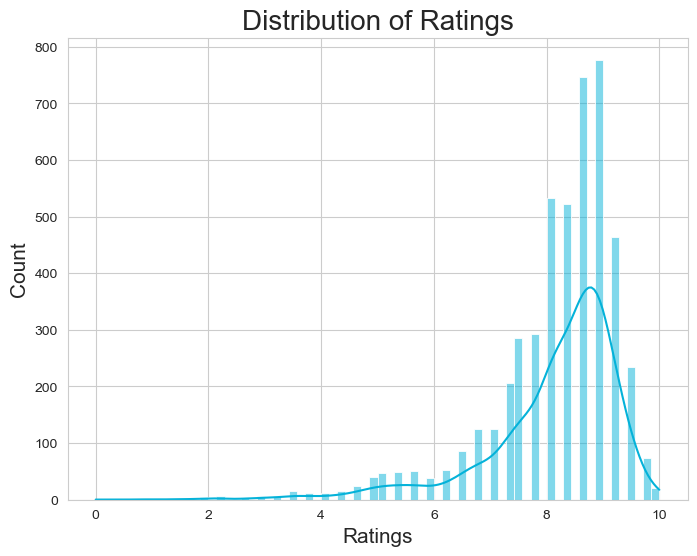

In [54]:
# Distribution of ratings with histogram

plt.figure(figsize=(8,6))
sns.histplot(df['rating'], kde=True)
plt.xlabel('Ratings', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Ratings', fontsize=20)
plt.show()

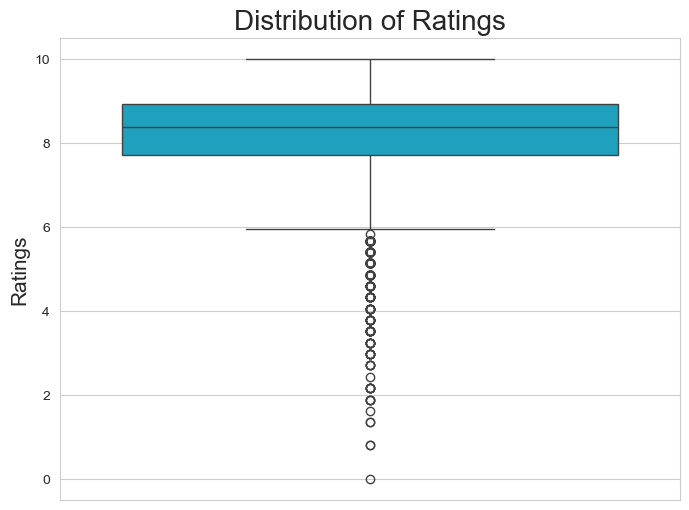

In [55]:
# Distribution of ratings with boxplot

plt.figure(figsize=(8,6))
sns.boxplot(df['rating'])
plt.ylabel('Ratings', fontsize=15)
plt.title('Distribution of Ratings', fontsize=20)
plt.show()

## Top-Rated Products

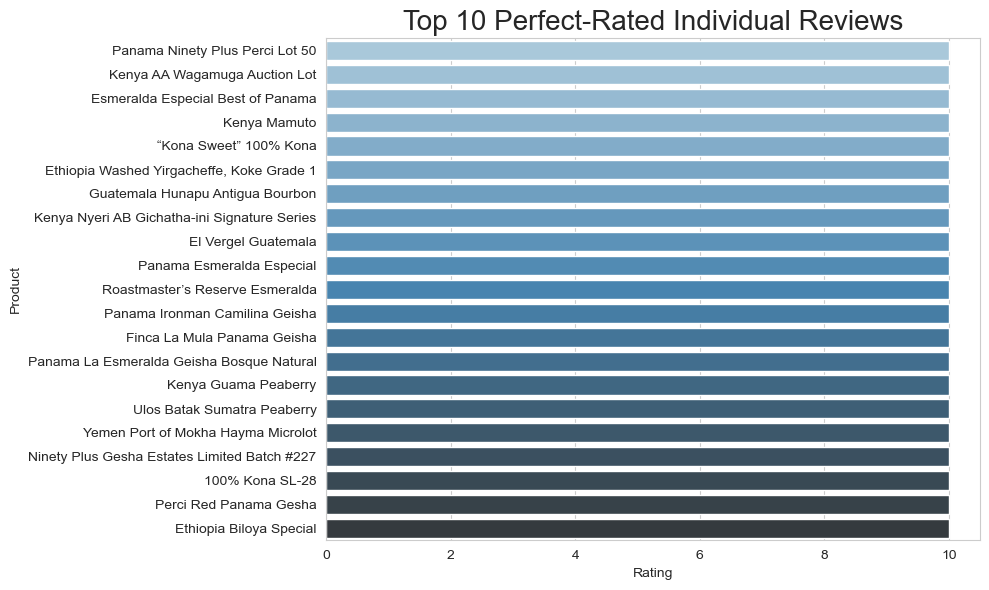

In [56]:
# Display individual products with a perfect rating of 10

top_reviews = df[df['rating'] == 10].sort_values(by='rating')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_reviews, x='rating', y='name', palette="Blues_d")
plt.xlabel('Rating')
plt.ylabel('Product')
plt.title('Top 10 Perfect-Rated Individual Reviews', fontsize=20)

plt.tight_layout()
plt.show()

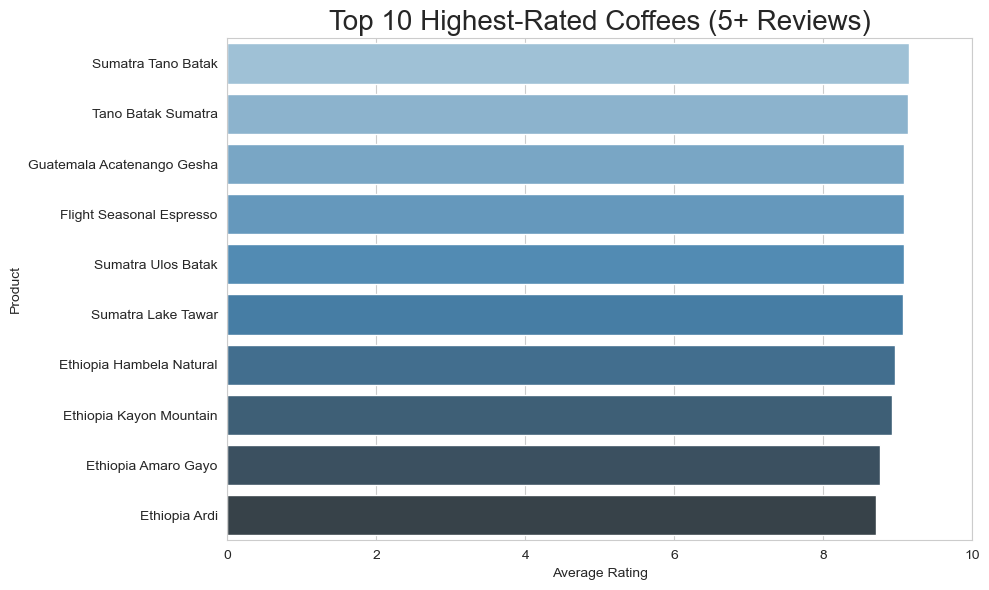

In [57]:
# Display the top 10 products with the highest average rating among those with at least 5 reviews

top_products = df.groupby('name').agg(
    avg_rating=('rating', 'mean'),
    review_count=('rating', 'count')
)

top_products = top_products[top_products['review_count'] >= 5]

top_products = top_products.sort_values(by='avg_rating', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='avg_rating', y='name', palette="Blues_d")
plt.xlabel('Average Rating')
plt.ylabel('Product')
plt.title('Top 10 Highest-Rated Coffees (5+ Reviews)', fontsize=20)
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [58]:
top_products

,name,avg_rating,review_count
0,Sumatra Tano Batak,9.150579,7
1,Tano Batak Sumatra,9.135135,5
2,Guatemala Acatenango Gesha,9.081081,5
3,Flight Seasonal Espresso,9.081081,5
4,Sumatra Ulos Batak,9.081081,5
5,Sumatra Lake Tawar,9.073359,7
6,Ethiopia Hambela Natural,8.957529,7
7,Ethiopia Kayon Mountain,8.918919,5
8,Ethiopia Amaro Gayo,8.756757,5
9,Ethiopia Ardi,8.702703,5


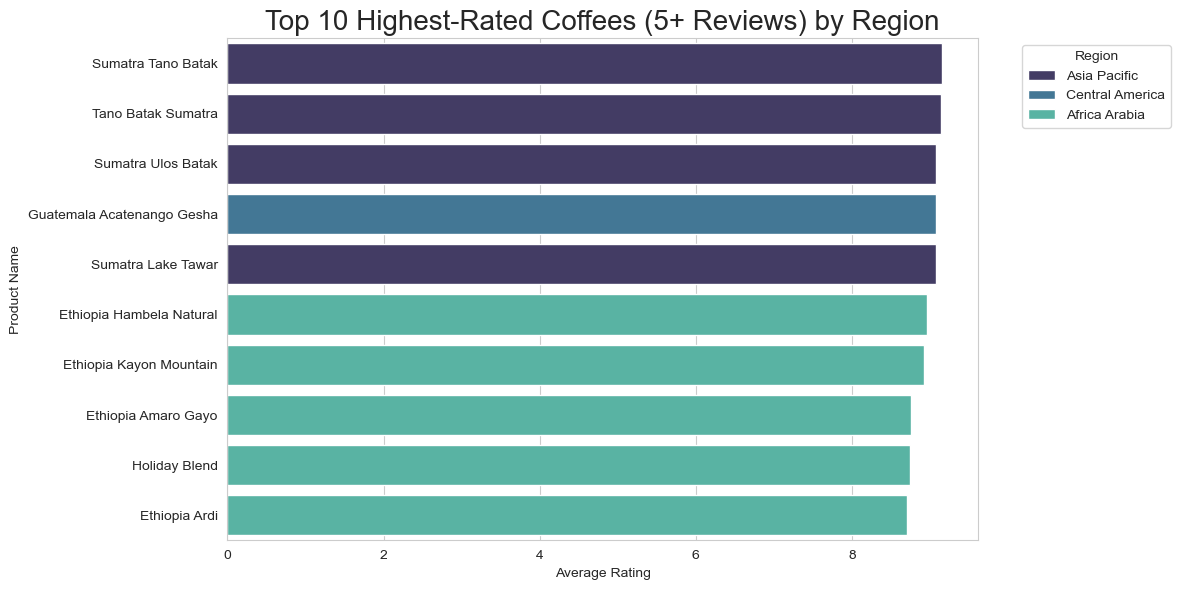

In [59]:
# Display the top 10 highest-rated products with at least 5 reviews, broken down by region

product_stats = (
    df.groupby(['name', 'region'])
    .agg(avg_rating=('rating', 'mean'), count=('rating', 'count'))
    .query('count >= 5')
    .sort_values(by='avg_rating', ascending=False)
    .reset_index()
)

top10_products = product_stats.head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot( data=top10_products, x='avg_rating', y='name', hue='region', dodge=False, palette='mako')
plt.title('Top 10 Highest-Rated Coffees (5+ Reviews) by Region', fontsize=20)
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [60]:
product_stats.head(10)

,name,region,avg_rating,count
0,Sumatra Tano Batak,Asia Pacific,9.150579,7
1,Tano Batak Sumatra,Asia Pacific,9.135135,5
2,Sumatra Ulos Batak,Asia Pacific,9.081081,5
3,Guatemala Acatenango Gesha,Central America,9.081081,5
4,Sumatra Lake Tawar,Asia Pacific,9.073359,7
5,Ethiopia Hambela Natural,Africa Arabia,8.957529,7
6,Ethiopia Kayon Mountain,Africa Arabia,8.918919,5
7,Ethiopia Amaro Gayo,Africa Arabia,8.756757,5
8,Holiday Blend,Africa Arabia,8.744038,17
9,Ethiopia Ardi,Africa Arabia,8.702703,5


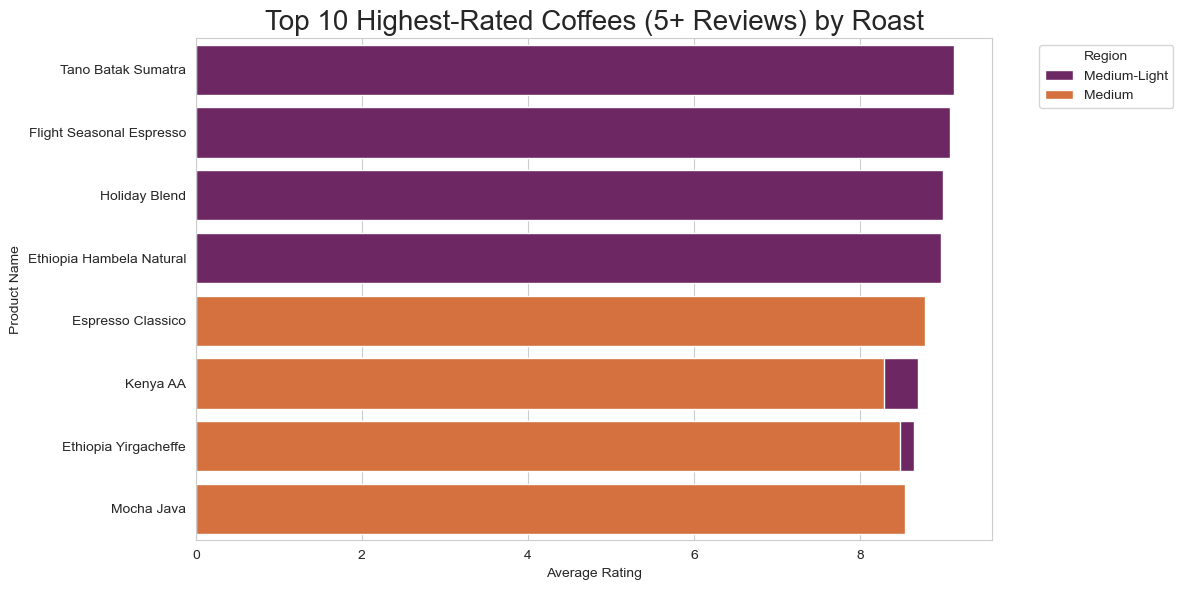

In [61]:
# Display the top 10 highest-rated products with at least 5 reviews, broken down by roast

product_stats = (
    df.groupby(['name', 'roast'])
    .agg(avg_rating=('rating', 'mean'), count=('rating', 'count'))
    .query('count >= 5')
    .sort_values(by='avg_rating', ascending=False)
    .reset_index()
)

top10_products = product_stats.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_products, x='avg_rating', y='name', hue='roast', dodge=False, palette='inferno')
plt.title('Top 10 Highest-Rated Coffees (5+ Reviews) by Roast', fontsize=20)
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
product_stats = (
    df.groupby(['name', 'roast'])
    .agg(avg_rating=('rating', 'mean'), count=('rating', 'count'))
    .query('count >= 5')
    .sort_values(by='avg_rating', ascending=False)
    .reset_index()
)

top10_products = product_stats.head(10)


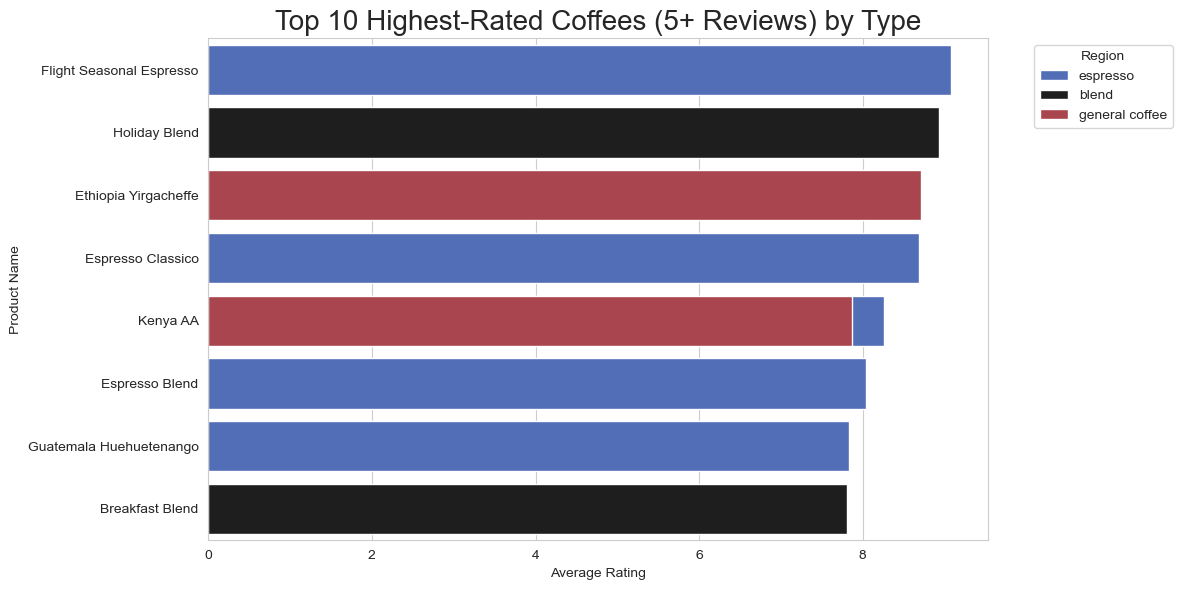

In [63]:
# Display the top 10 highest-rated products with at least 5 reviews, broken down by type


product_stats = (
    df.groupby(['name', 'type'])
    .agg(avg_rating=('rating', 'mean'), count=('rating', 'count'))
    .query('count >= 5')
    .sort_values(by='avg_rating', ascending=False)
    .reset_index()
)

top10_products = product_stats.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_products, x='avg_rating', y='name', hue='type', dodge=False, palette='icefire')
plt.title('Top 10 Highest-Rated Coffees (5+ Reviews) by Type', fontsize=20)
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [64]:
top10_products

,name,type,avg_rating,count
0,Flight Seasonal Espresso,espresso,9.081081,5
1,Holiday Blend,blend,8.934817,17
2,Ethiopia Yirgacheffe,general coffee,8.708709,9
3,Espresso Classico,espresso,8.687259,7
4,Kenya AA,espresso,8.262548,7
5,Ethiopia Yirgacheffe,espresso,8.243243,8
6,Espresso Blend,espresso,8.036036,15
7,Kenya AA,general coffee,7.867868,9
8,Guatemala Huehuetenango,espresso,7.837838,5
9,Breakfast Blend,blend,7.807808,9


## Roaster Analysis

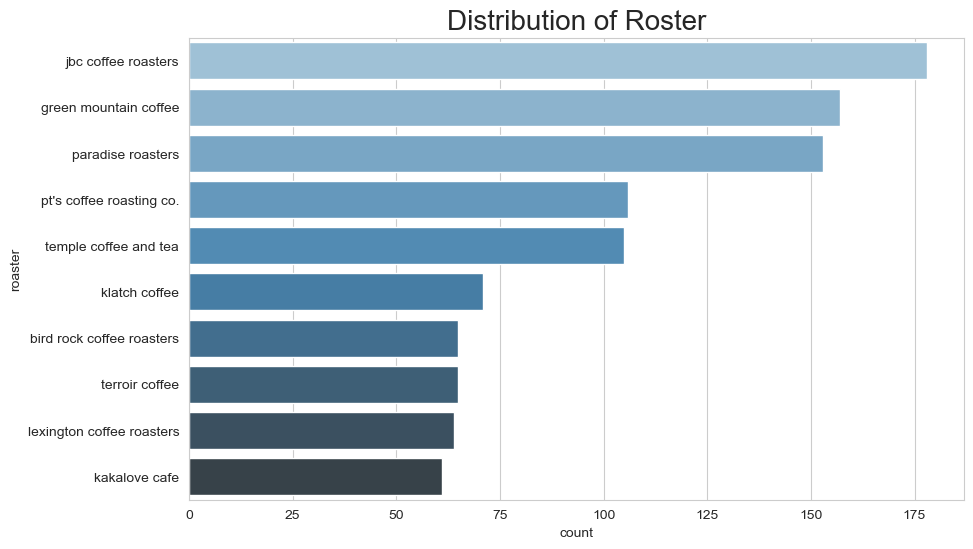

In [65]:
# Display the 10 most frequently reviewed roasters

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='roaster', order=df['roaster'].value_counts().nlargest(10).index, palette="Blues_d")
plt.title('Distribution of Roster', fontsize=20)
plt.show()

In [66]:
df['roaster'].value_counts().nlargest(10)

roaster
jbc coffee roasters          178
green mountain coffee        157
paradise roasters            153
pt's coffee roasting co.     106
temple coffee and tea        105
klatch coffee                 71
bird rock coffee roasters     65
terroir coffee                65
lexington coffee roasters     64
kakalove cafe                 61
Name: count, dtype: int64

In [67]:
top_products

,name,avg_rating,review_count
0,Sumatra Tano Batak,9.150579,7
1,Tano Batak Sumatra,9.135135,5
2,Guatemala Acatenango Gesha,9.081081,5
3,Flight Seasonal Espresso,9.081081,5
4,Sumatra Ulos Batak,9.081081,5
5,Sumatra Lake Tawar,9.073359,7
6,Ethiopia Hambela Natural,8.957529,7
7,Ethiopia Kayon Mountain,8.918919,5
8,Ethiopia Amaro Gayo,8.756757,5
9,Ethiopia Ardi,8.702703,5


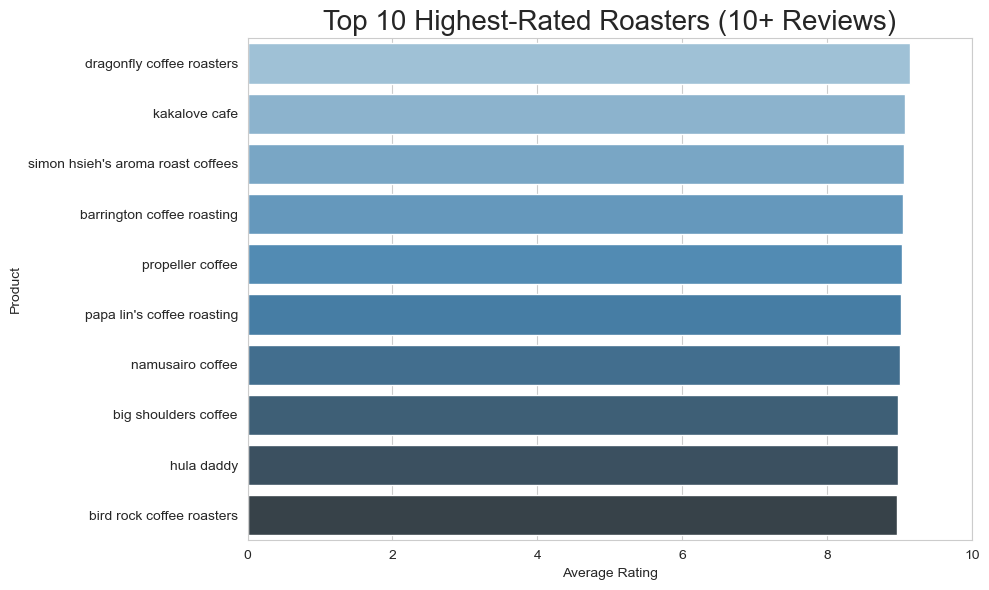

In [68]:
# Display the top 10 roasters with the highest average rating among those with at least 10 reviews

top_products = df.groupby('roaster').agg(
    avg_rating=('rating', 'mean'),
    review_count=('rating', 'count')
)

top_products = top_products[top_products['review_count'] >= 10]

top_products = top_products.sort_values(by='avg_rating', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='avg_rating', y='roaster', palette='Blues_d')
plt.xlabel('Average Rating')
plt.ylabel('Product')
plt.title('Top 10 Highest-Rated Roasters (10+ Reviews)', fontsize=20)
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [69]:
top_products

,roaster,avg_rating,review_count
0,dragonfly coffee roasters,9.141494,51
1,kakalove cafe,9.078423,61
2,simon hsieh's aroma roast coffees,9.062328,49
3,barrington coffee roasting,9.041769,11
4,propeller coffee,9.027027,10
5,papa lin's coffee roasting,9.013514,20
6,namusairo coffee,9.000000,10
7,big shoulders coffee,8.978979,18
8,hula daddy,8.975818,19
9,bird rock coffee roasters,8.964657,65


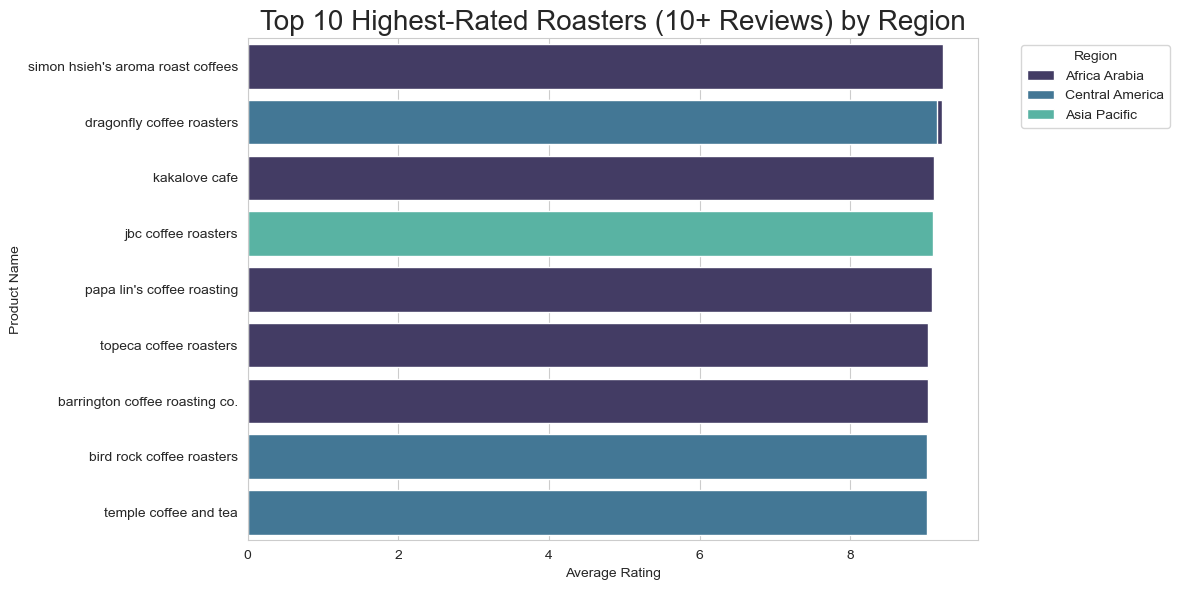

In [70]:
# Display the top 10 highest-rated roasters with at least 10 reviews, broken down by region

product_stats = (
    df.groupby(['roaster', 'region'])
    .agg(avg_rating=('rating', 'mean'), count=('rating', 'count'))
    .query('count >= 10')
    .sort_values(by='avg_rating', ascending=False)
    .reset_index()
)

top10_products = product_stats.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_products, x='avg_rating', y='roaster', hue='region', dodge=False, palette='mako')
plt.title('Top 10 Highest-Rated Roasters (10+ Reviews) by Region', fontsize=20)
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [71]:
product_stats.head(10)

,roaster,region,avg_rating,count
0,simon hsieh's aroma roast coffees,Africa Arabia,9.229229,27
1,dragonfly coffee roasters,Africa Arabia,9.216216,20
2,dragonfly coffee roasters,Central America,9.156757,25
3,kakalove cafe,Africa Arabia,9.112808,46
4,jbc coffee roasters,Asia Pacific,9.099099,18
5,papa lin's coffee roasting,Africa Arabia,9.085239,13
6,topeca coffee roasters,Africa Arabia,9.027027,10
7,barrington coffee roasting co.,Africa Arabia,9.027027,25
8,bird rock coffee roasters,Central America,9.016216,25
9,temple coffee and tea,Central America,9.015015,45


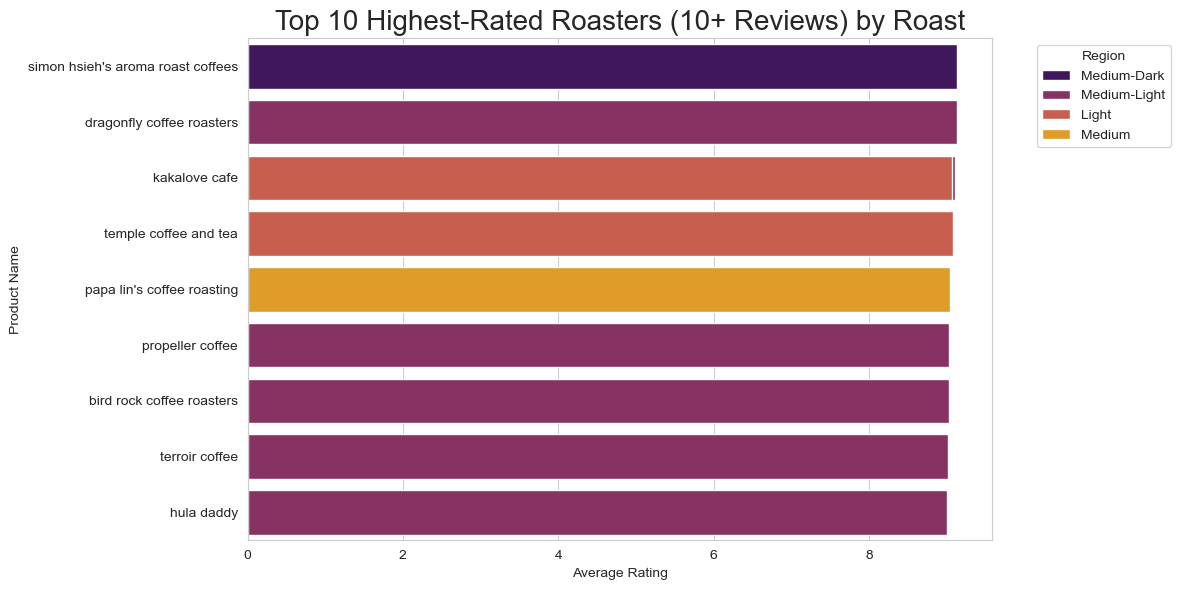

In [72]:
# Display the top 10 highest-rated roasters with at least 10 reviews, broken down by roast

product_stats = (
    df.groupby(['roaster', 'roast'])
    .agg(avg_rating=('rating', 'mean'), count=('rating', 'count'))
    .query('count >= 10')
    .sort_values(by='avg_rating', ascending=False)
    .reset_index()
)

top10_products = product_stats.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_products, x='avg_rating', y='roaster', hue='roast', dodge=False, palette='inferno')
plt.title('Top 10 Highest-Rated Roasters (10+ Reviews) by Roast', fontsize=20)
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
product_stats.head(10)


,roaster,roast,avg_rating,count
0,simon hsieh's aroma roast coffees,Medium-Dark,9.131274,14
1,dragonfly coffee roasters,Medium-Light,9.130752,37
2,kakalove cafe,Medium-Light,9.101351,40
3,temple coffee and tea,Light,9.081081,15
4,kakalove cafe,Light,9.063063,15
5,papa lin's coffee roasting,Medium,9.043659,13
6,propeller coffee,Medium-Light,9.027027,10
7,bird rock coffee roasters,Medium-Light,9.025770,43
8,terroir coffee,Medium-Light,9.011583,35
9,hula daddy,Medium-Light,9.009009,12


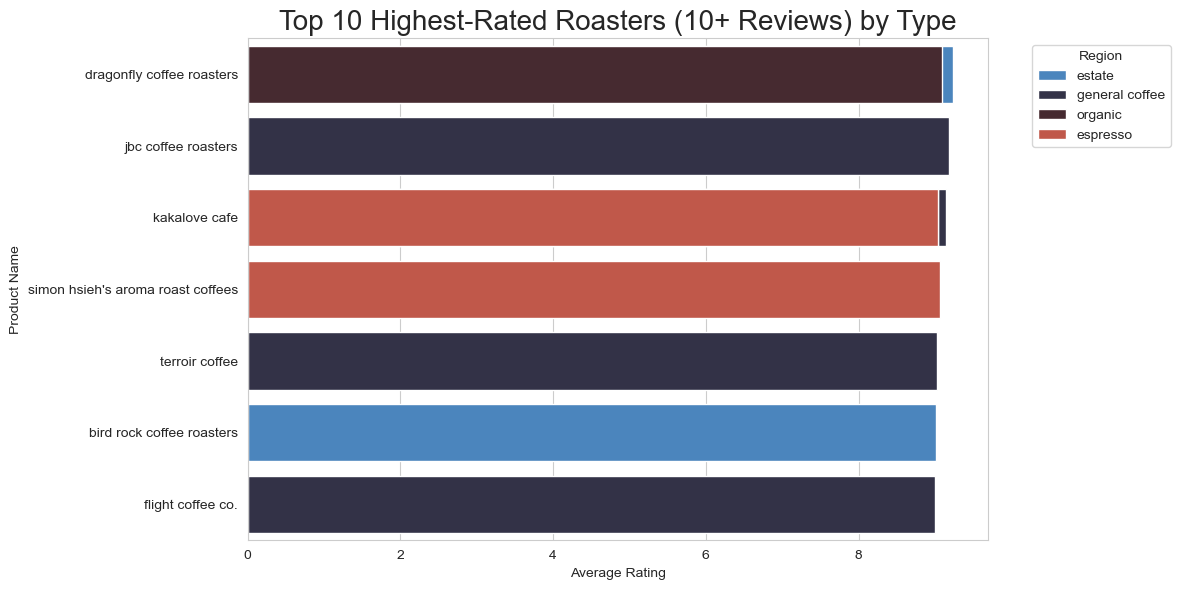

In [74]:
# Display the top 10 highest-rated roasters with at least 10 reviews, broken down by type

product_stats = (
    df.groupby(['roaster', 'type'])
    .agg(avg_rating=('rating', 'mean'), count=('rating', 'count'))
    .query('count >= 10')
    .sort_values(by='avg_rating', ascending=False)
    .reset_index()
)

top10_products = product_stats.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_products, x='avg_rating', y='roaster', hue='type', dodge=False, palette='icefire')
plt.title('Top 10 Highest-Rated Roasters (10+ Reviews) by Type', fontsize=20)
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
product_stats.head(10)

,roaster,type,avg_rating,count
0,dragonfly coffee roasters,estate,9.236193,23
1,jbc coffee roasters,general coffee,9.189189,22
2,kakalove cafe,general coffee,9.145946,25
3,dragonfly coffee roasters,organic,9.090909,11
4,simon hsieh's aroma roast coffees,espresso,9.062328,49
5,kakalove cafe,espresso,9.041769,11
6,kakalove cafe,organic,9.039039,18
7,terroir coffee,general coffee,9.027027,10
8,bird rock coffee roasters,estate,9.009009,24
9,flight coffee co.,general coffee,8.996139,14


## Seasonal Trends


In [76]:
# Analyze seasonal trends by calculating average rating and review count for each season

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['review_month'].apply(get_season)

seasonal_trends = df.groupby('season').agg(
    avg_rating=('rating', 'mean'),
    review_count=('rating', 'count')
).reindex(['Winter', 'Spring', 'Summer', 'Fall'])

seasonal_trends

,avg_rating,review_count
season,,
Winter,8.052258,1234
Spring,8.007748,1193
Summer,8.130413,1139
Fall,8.293441,1321


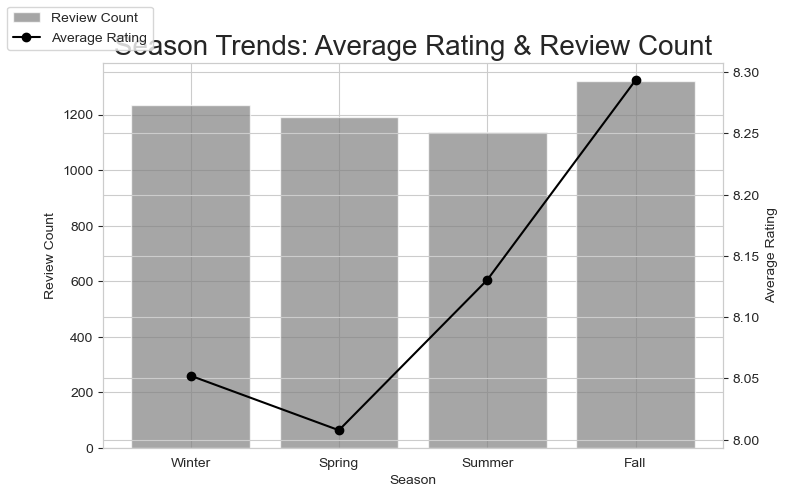

In [77]:
# Visualize seasonal trends by plotting review count as bars and average rating as a line

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(seasonal_trends.index, seasonal_trends['review_count'], color='grey', alpha=0.7, label='Review Count')
ax1.set_ylabel('Review Count')
ax1.set_xlabel('Season')
ax2 = ax1.twinx()
ax2.plot(seasonal_trends.index, seasonal_trends['avg_rating'], marker='o', color='black', label='Average Rating')
ax2.set_ylabel('Average Rating')
ax2.set_xlabel('Season')

plt.title('Season Trends: Average Rating & Review Count', fontsize=20)

fig.legend(loc='upper left')
plt.show()

## Long-Term Trends

In [78]:
# Analyze yearly trends by calculating average rating and review count for each year

yearly_trends = df.groupby('review_year').agg(
    avg_rating=('rating', 'mean'),
    review_count=('rating', 'count')
)

yearly_trends

,avg_rating,review_count
review_year,,
1997,5.416216,100
1998,5.705863,124
1999,6.399684,137
2000,6.385506,91
2001,6.720721,60
2002,6.861738,121
2003,7.252991,122
2004,7.443622,157
2005,7.546332,140


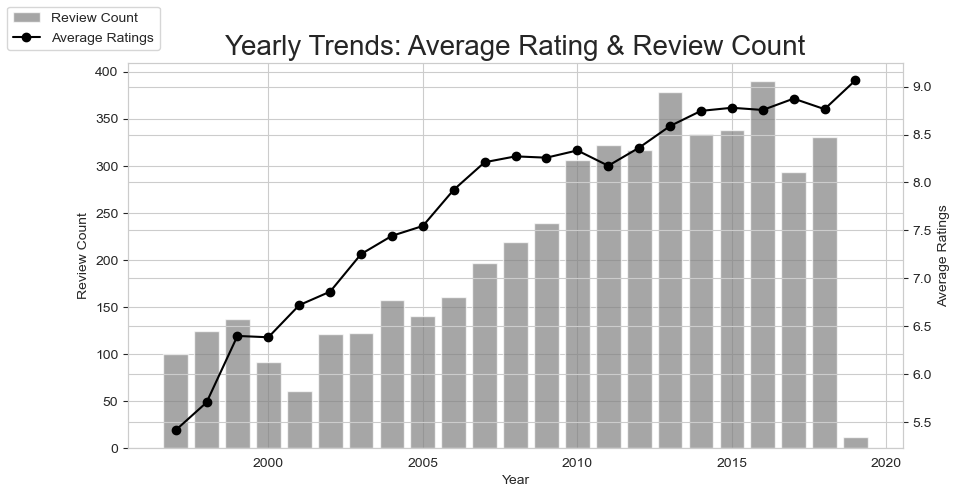

In [79]:
# Visualize yearly trends by plotting review count as bars and average rating as a line

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(yearly_trends.index, yearly_trends['review_count'], color='grey', alpha=0.7, label='Review Count')
ax1.set_ylabel('Review Count')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2.plot(yearly_trends.index, yearly_trends['avg_rating'], color='black', label='Average Ratings', marker='o')
ax2.set_ylabel('Average Ratings')
plt.title('Yearly Trends: Average Rating & Review Count', fontsize=20)

fig.legend(loc='upper left')
plt.show()

## Regional Performance


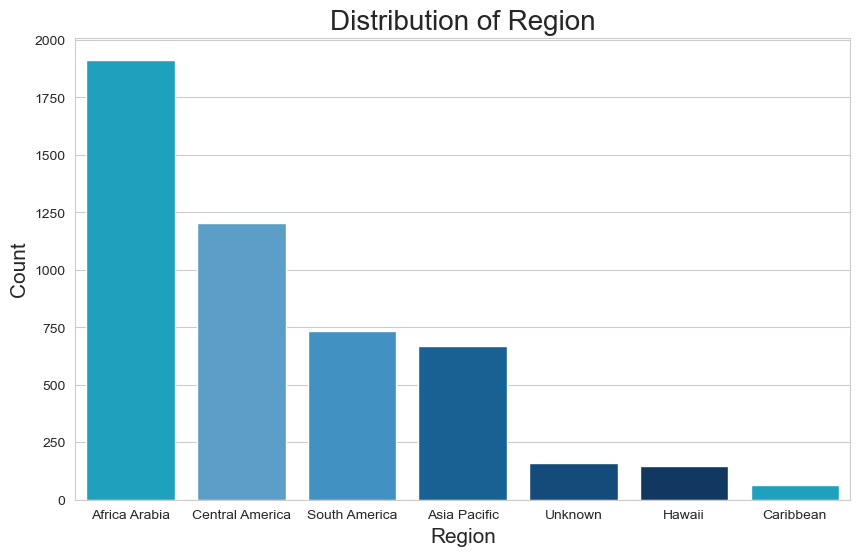

In [80]:
# Distribution of region

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='region', order=df['region'].value_counts().index, palette=palette)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Region', fontsize=20)
plt.show()

In [81]:
df['region'].value_counts()

region
Africa Arabia      1914
Central America    1204
South America       733
Asia Pacific        669
Unknown             158
Hawaii              145
Caribbean            64
Name: count, dtype: int64

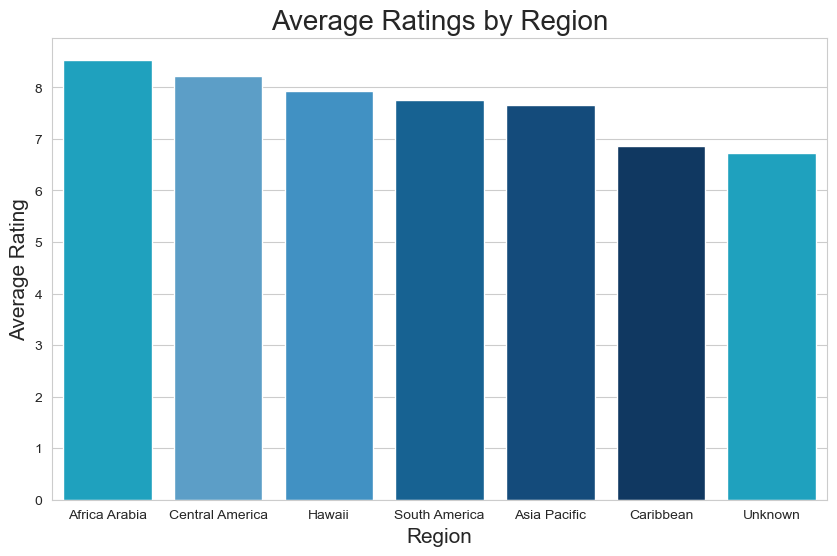

In [82]:
# Display the average ratings by region

region_ratings = df.groupby('region')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_ratings.index, y=region_ratings.values, palette=palette)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.title('Average Ratings by Region', fontsize=20)
plt.show()

In [83]:
region_ratings

region
Africa Arabia      8.536107
Central America    8.223489
Hawaii             7.919851
South America      7.763578
Asia Pacific       7.660991
Caribbean          6.853885
Unknown            6.732809
Name: rating, dtype: float64

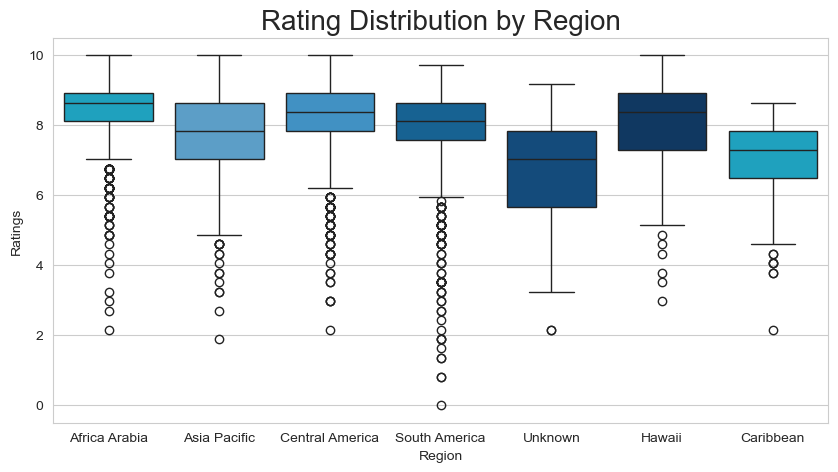

In [84]:
# Display the average ratings by region with boxplot

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='region', y='rating', palette=palette)
plt.xlabel('Region')
plt.ylabel('Ratings')
plt.title('Rating Distribution by Region', fontsize=20)
plt.show()

## Roast Types


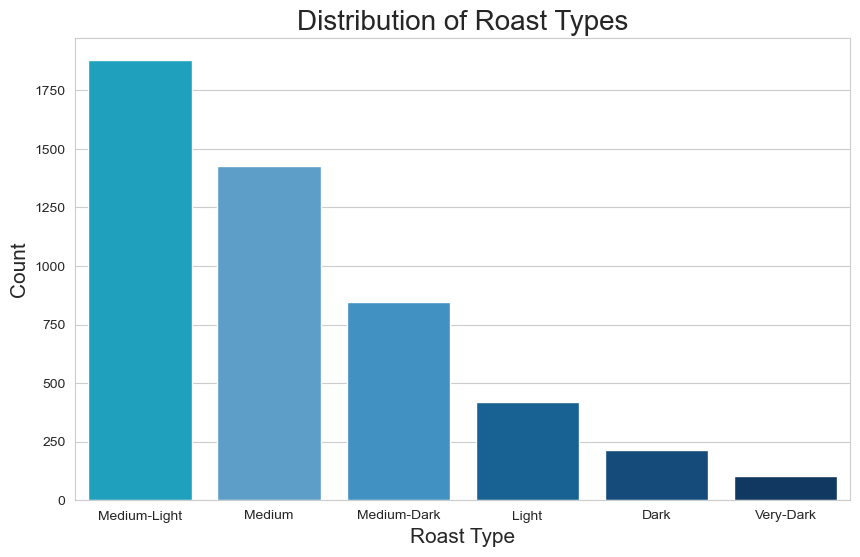

In [85]:
# Distribution of roast types

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='roast', order=df['roast'].value_counts().index, palette=palette)
plt.xlabel('Roast Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Roast Types', fontsize=20)
plt.show()

In [86]:
df['roast'].value_counts()


roast
Medium-Light    1878
Medium          1427
Medium-Dark      845
Light            418
Dark             216
Very-Dark        103
Name: count, dtype: int64

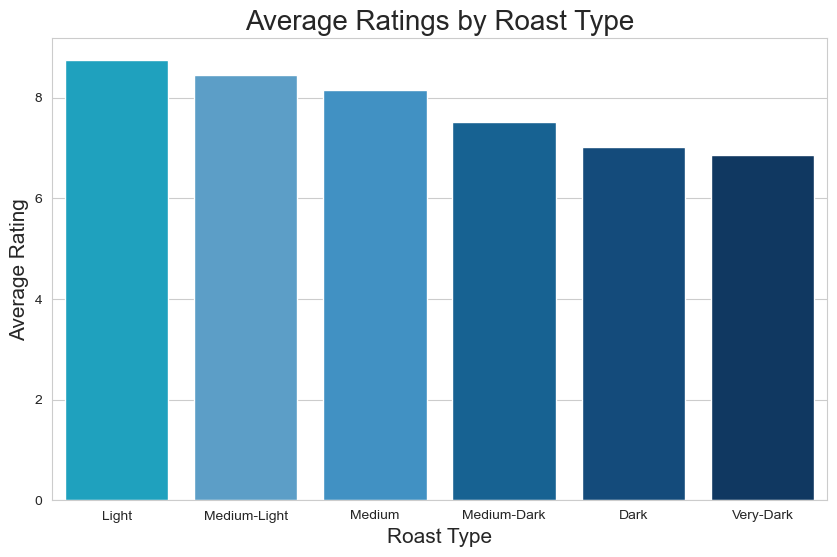

In [87]:
# Display the average ratings by roast type

roast_ratings = df.groupby('roast')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=roast_ratings.index, y=roast_ratings.values, palette=palette)
plt.xlabel('Roast Type', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.title('Average Ratings by Roast Type', fontsize=20)
plt.show()

In [88]:
roast_ratings

roast
Light           8.741110
Medium-Light    8.441700
Medium          8.150154
Medium-Dark     7.510587
Dark            7.014515
Very-Dark       6.861716
Name: rating, dtype: float64

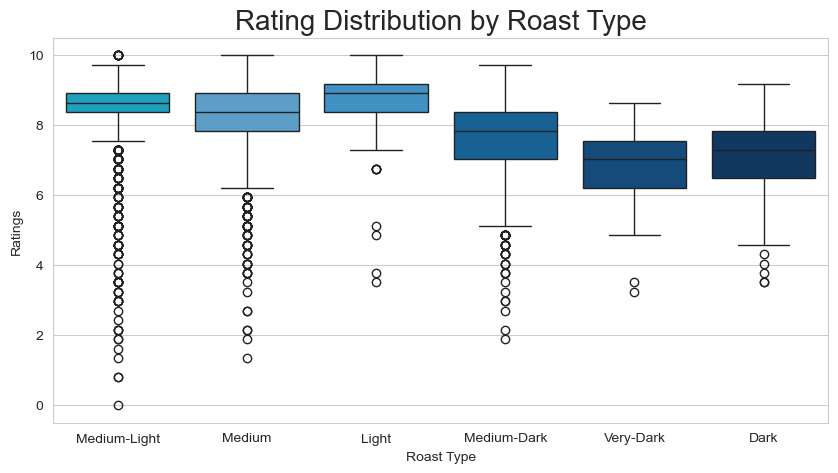

In [89]:
# Display the average ratings by roast type with boxplot

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='roast', y='rating', palette=palette)
plt.xlabel('Roast Type')
plt.ylabel('Ratings')
plt.title('Rating Distribution by Roast Type', fontsize=20)
plt.show()

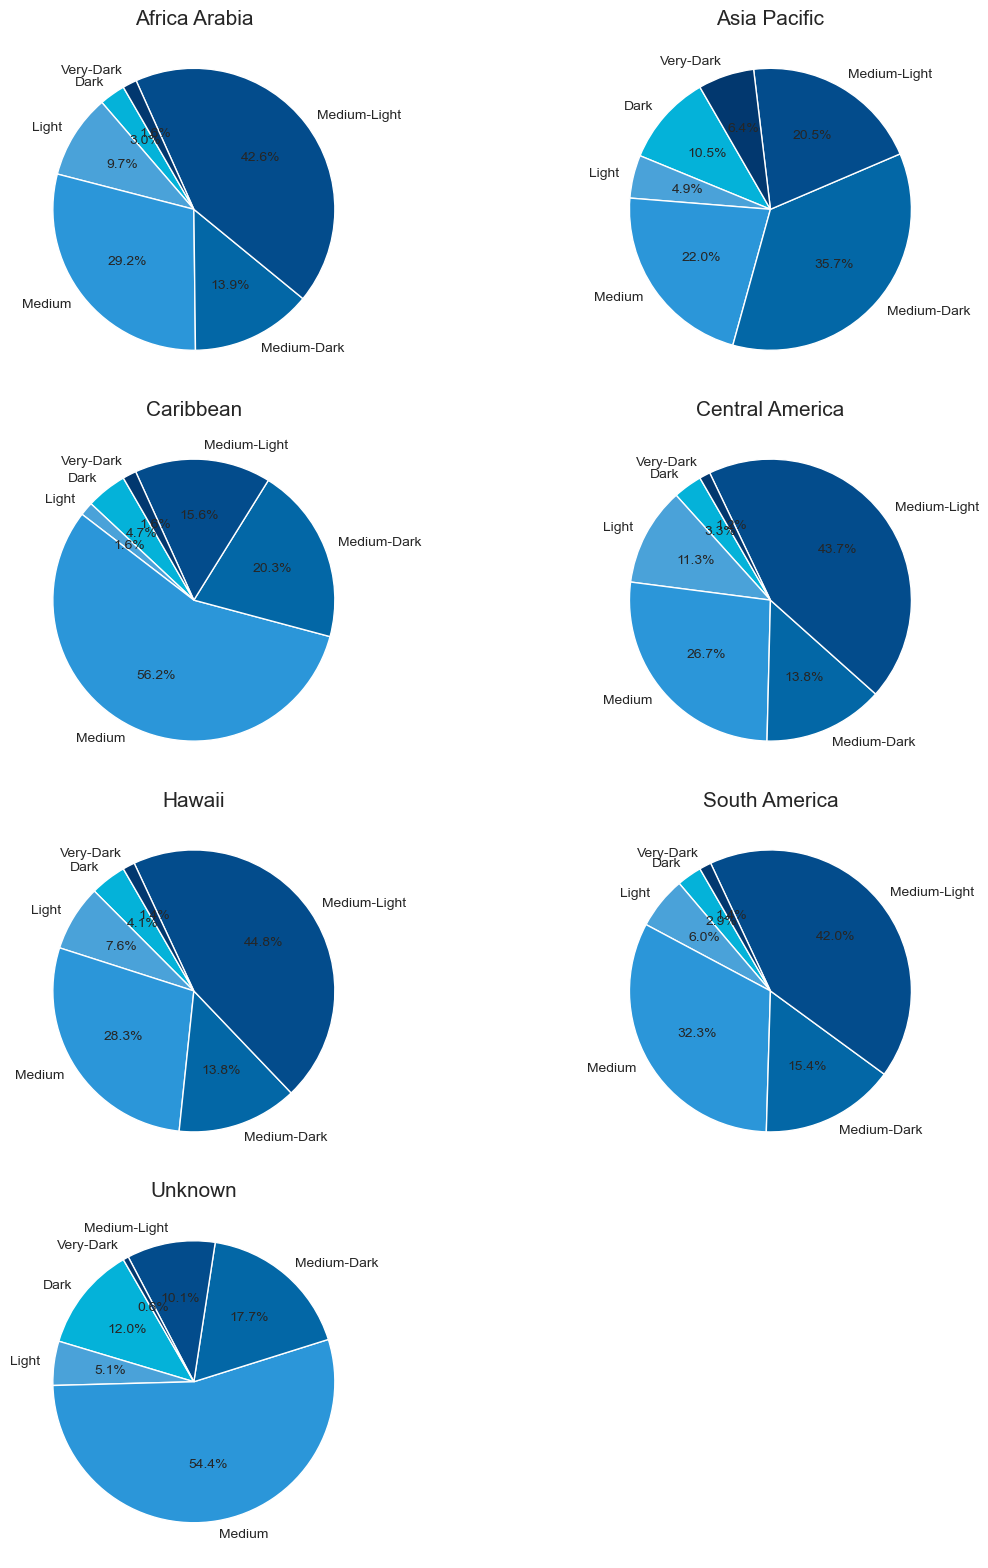

In [90]:
# Pie charts for each region showing the distribution of roasts

roast_region_counts = df.groupby(['region', 'roast']).size().unstack(fill_value=0)

num_regions = len(roast_region_counts)
rows = (num_regions // 2) + 1 
cols = min(num_regions, 2)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten() 
for i, (region, counts) in enumerate(roast_region_counts.iterrows()):
    roast_labels = counts.index.tolist()


    axes[i].pie(counts, labels=roast_labels, autopct='%1.1f%%', startangle=120)
    axes[i].set_title(region, fontsize=15)

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

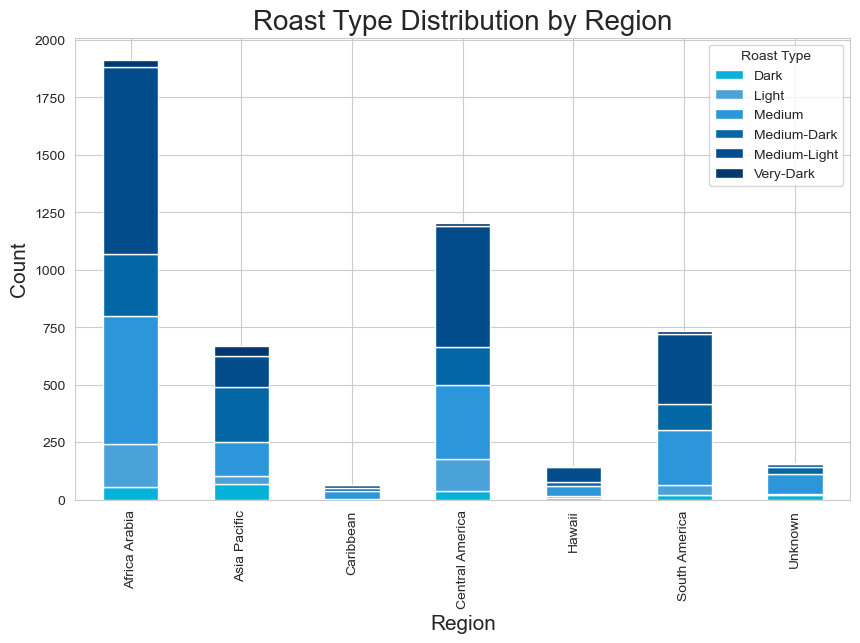

In [91]:
# Stacked bar chart showing the roast type distribution by region

roast_region_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Roast Type Distribution by Region', fontsize=20)
plt.legend(title='Roast Type')
plt.show()

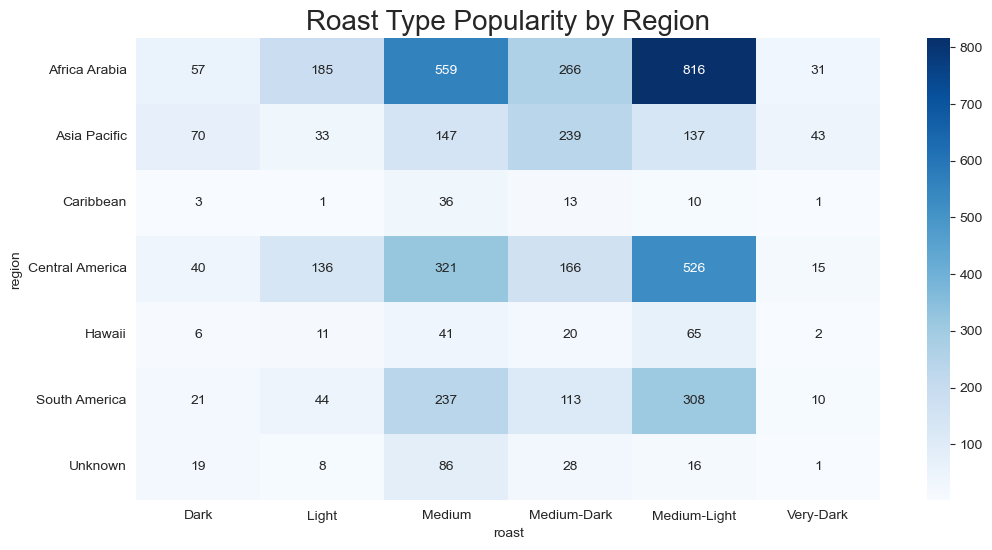

In [92]:
# Heatmap showing the popularity of each roast type across different regions

roast_region = df.pivot_table(index='region', columns='roast', values='rating', aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(roast_region, cmap='Blues', annot=True, fmt='.0f')
plt.title('Roast Type Popularity by Region', fontsize=20)
plt.show()

## Coffee Types

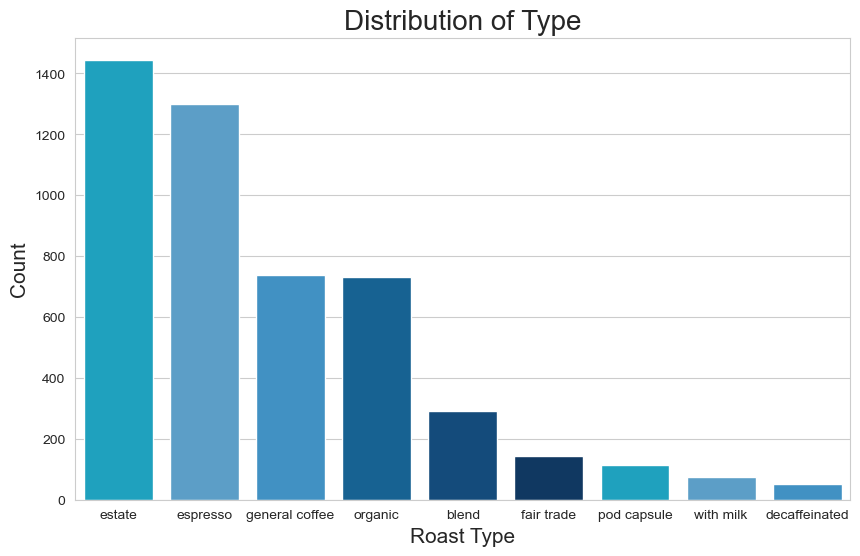

In [93]:
# Distribution of type

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette=palette)
plt.xlabel('Roast Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Type', fontsize=20)
plt.show()

In [94]:
df['type'].value_counts()

type
estate            1445
espresso          1298
general coffee     737
organic            732
blend              290
fair trade         142
pod capsule        115
with milk           76
decaffeinated       52
Name: count, dtype: int64

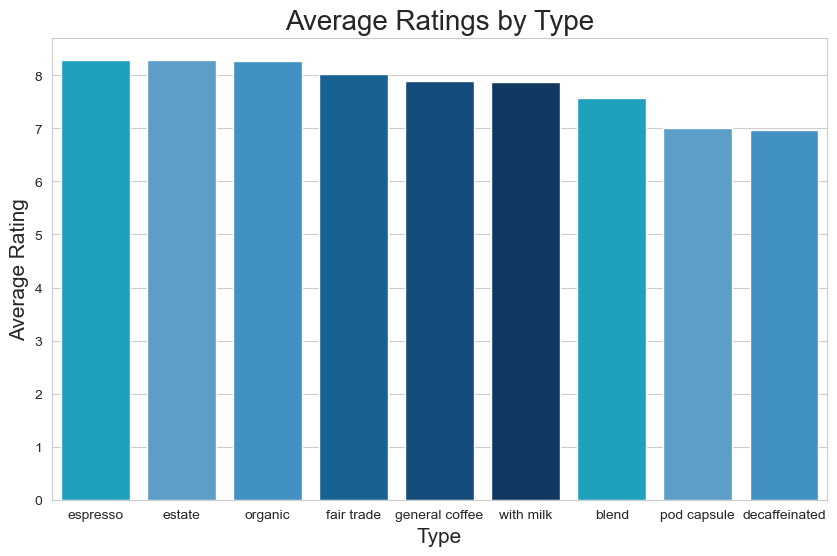

In [95]:
# Display the average ratings by type

type_ratings = df.groupby('type')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=type_ratings.index, y=type_ratings.values, palette=palette)
plt.xlabel('Type', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.title('Average Ratings by Type', fontsize=20)
plt.show()

In [96]:
type_ratings

type
espresso          8.294101
estate            8.283662
organic           8.262074
fair trade        8.020556
general coffee    7.893579
with milk         7.880512
blend             7.580615
pod capsule       7.010576
decaffeinated     6.969854
Name: rating, dtype: float64

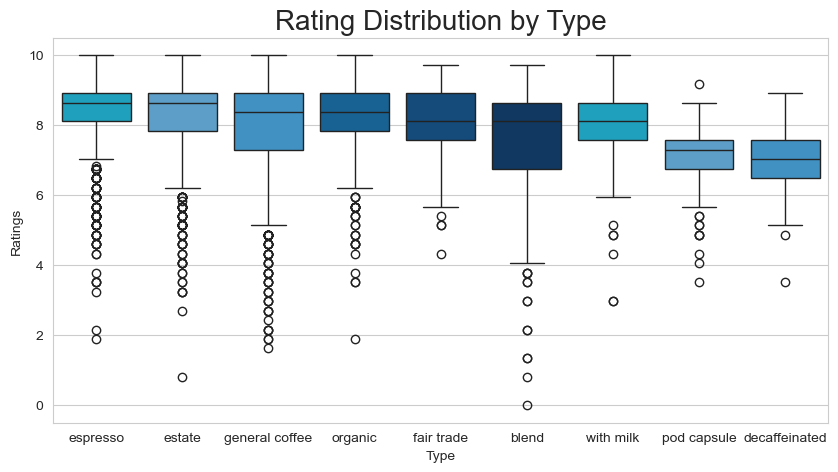

In [97]:
# Display the average ratings by type with boxplot

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='type', y='rating', palette=palette)
plt.xlabel('Type')
plt.ylabel('Ratings')
plt.title('Rating Distribution by Type', fontsize=20)
plt.show()

## Sensory Attributes Analysis


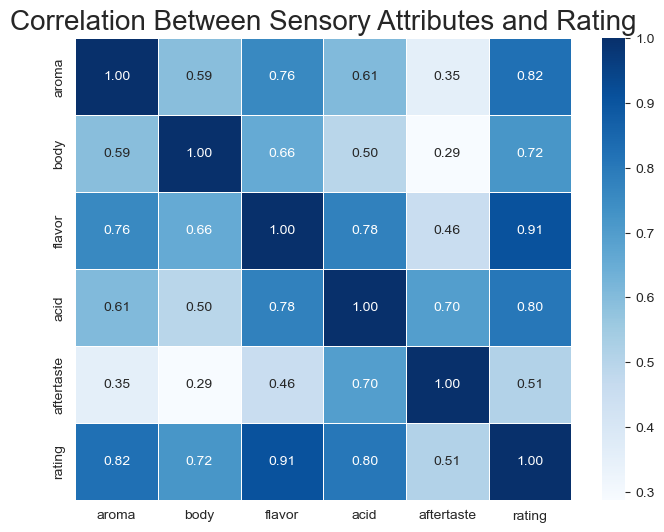

In [98]:
# Display how sensory attributes correlate with each other and with overall rating

sensory_cols = ['aroma', 'body', 'flavor', 'acid', 'aftertaste', 'rating']
sensory_data = df[sensory_cols]

correlation_matrix = sensory_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Sensory Attributes and Rating', fontsize=20)
plt.show()

In [99]:
sensory_cols = ['aroma', 'body', 'flavor', 'acid', 'aftertaste']


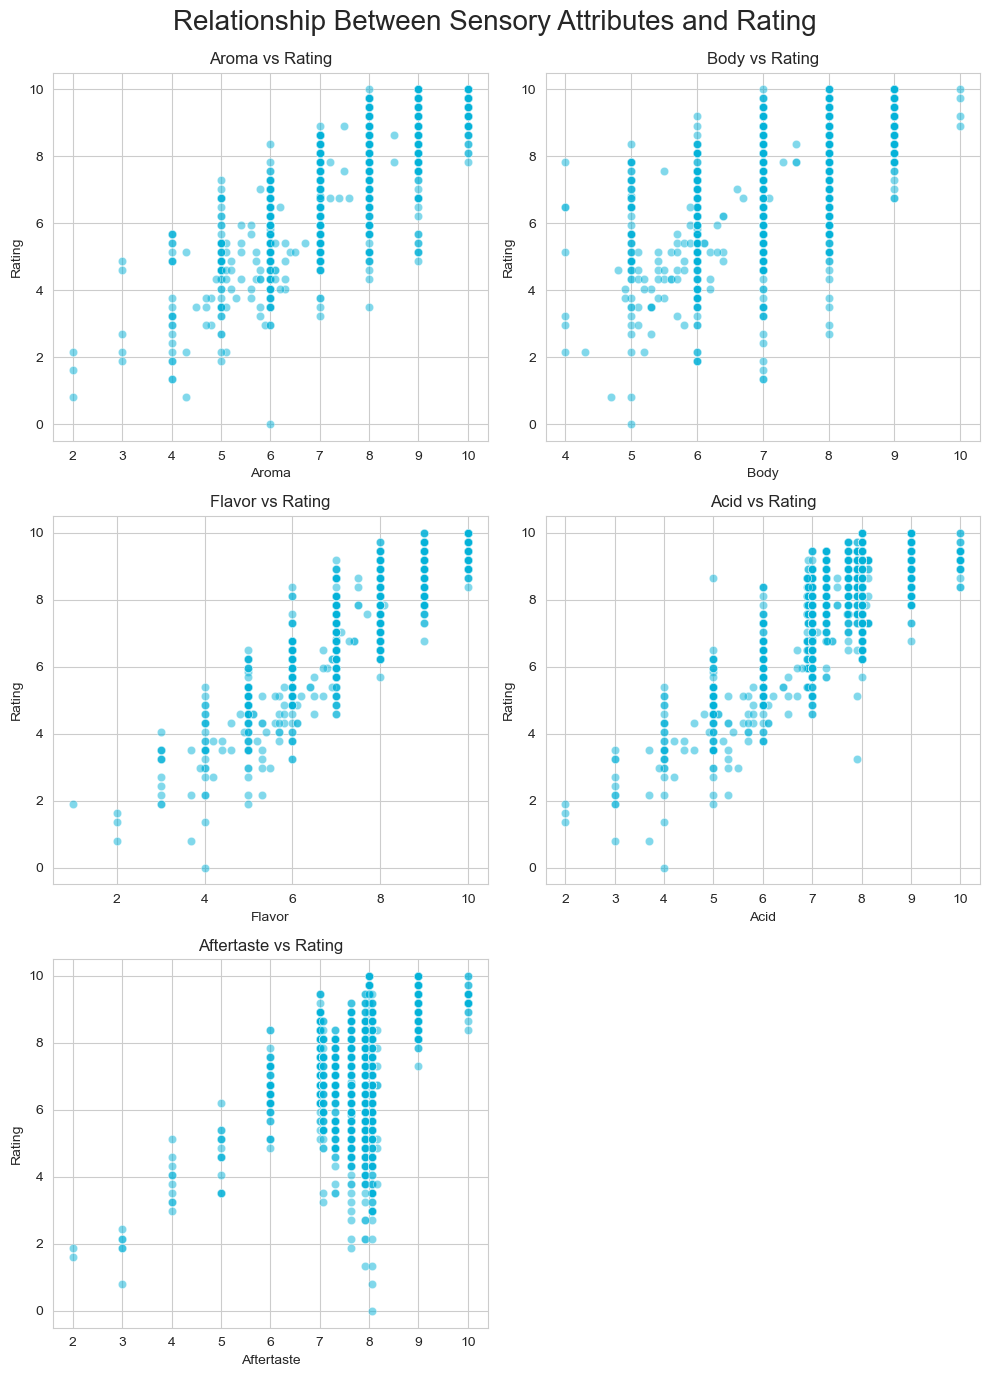

In [100]:
# Visualize the relationship between sensory attributes and rating

fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.flatten()

for i, col in enumerate(sensory_cols):
    sns.scatterplot(data=df, x=col, y='rating', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} vs Rating')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Rating')

fig.delaxes(axes[-1])

plt.suptitle('Relationship Between Sensory Attributes and Rating', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()

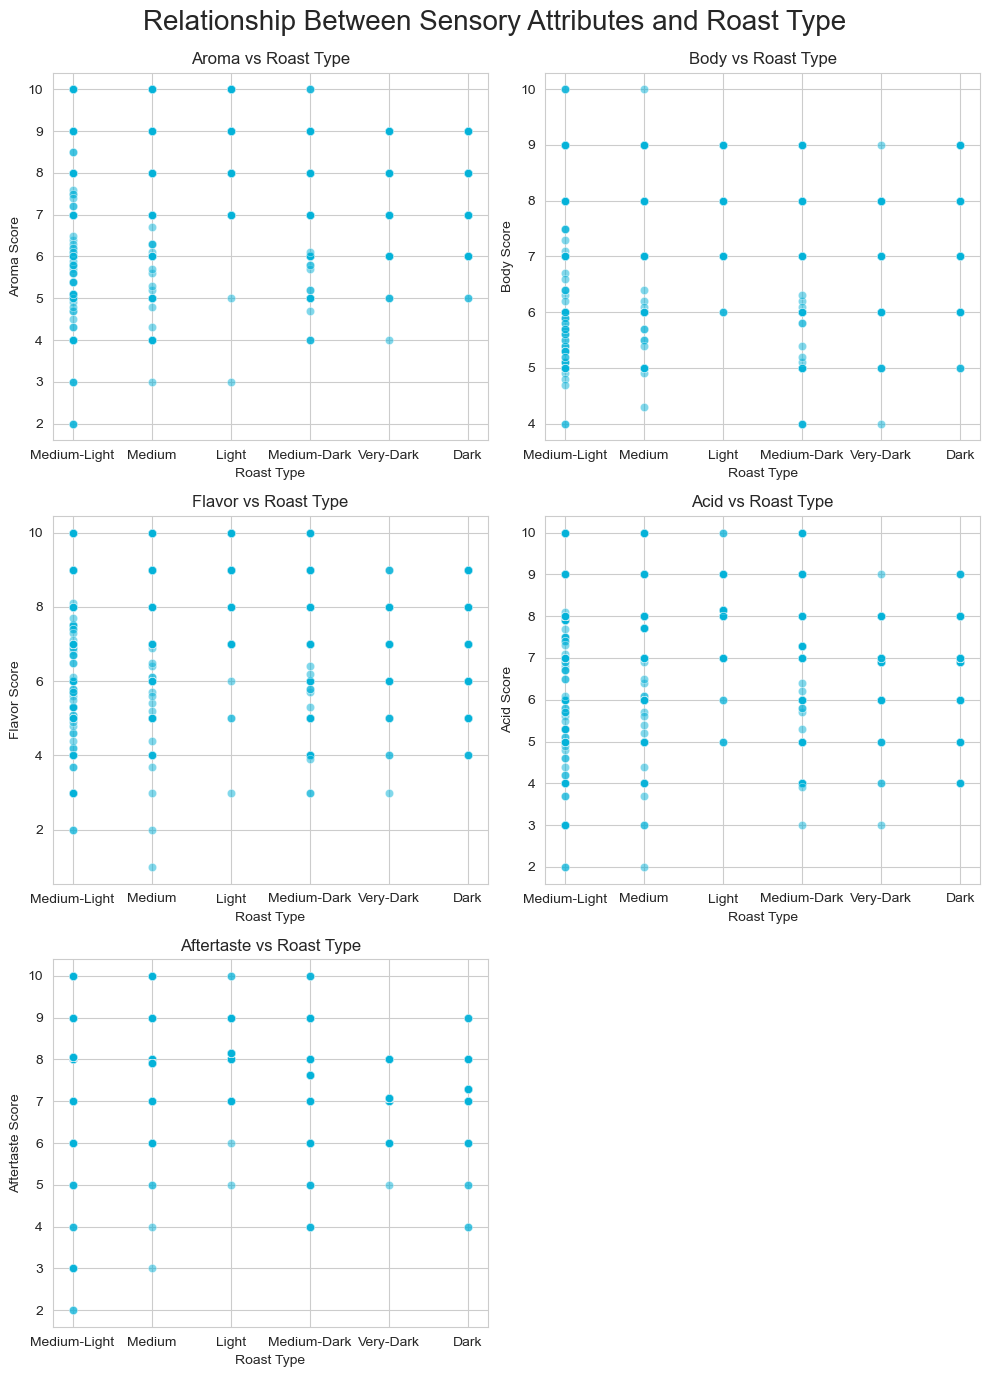

In [101]:
# Visualize the relationship between sensory attributes and roast type

fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.flatten()

for i, col in enumerate(sensory_cols):
    sns.scatterplot(data=df, y=col, x='roast', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} vs Roast Type')
    axes[i].set_xlabel('Roast Type')
    axes[i].set_ylabel(f'{col.capitalize()} Score')

fig.delaxes(axes[-1])

plt.suptitle('Relationship Between Sensory Attributes and Roast Type', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.99])  
plt.show()

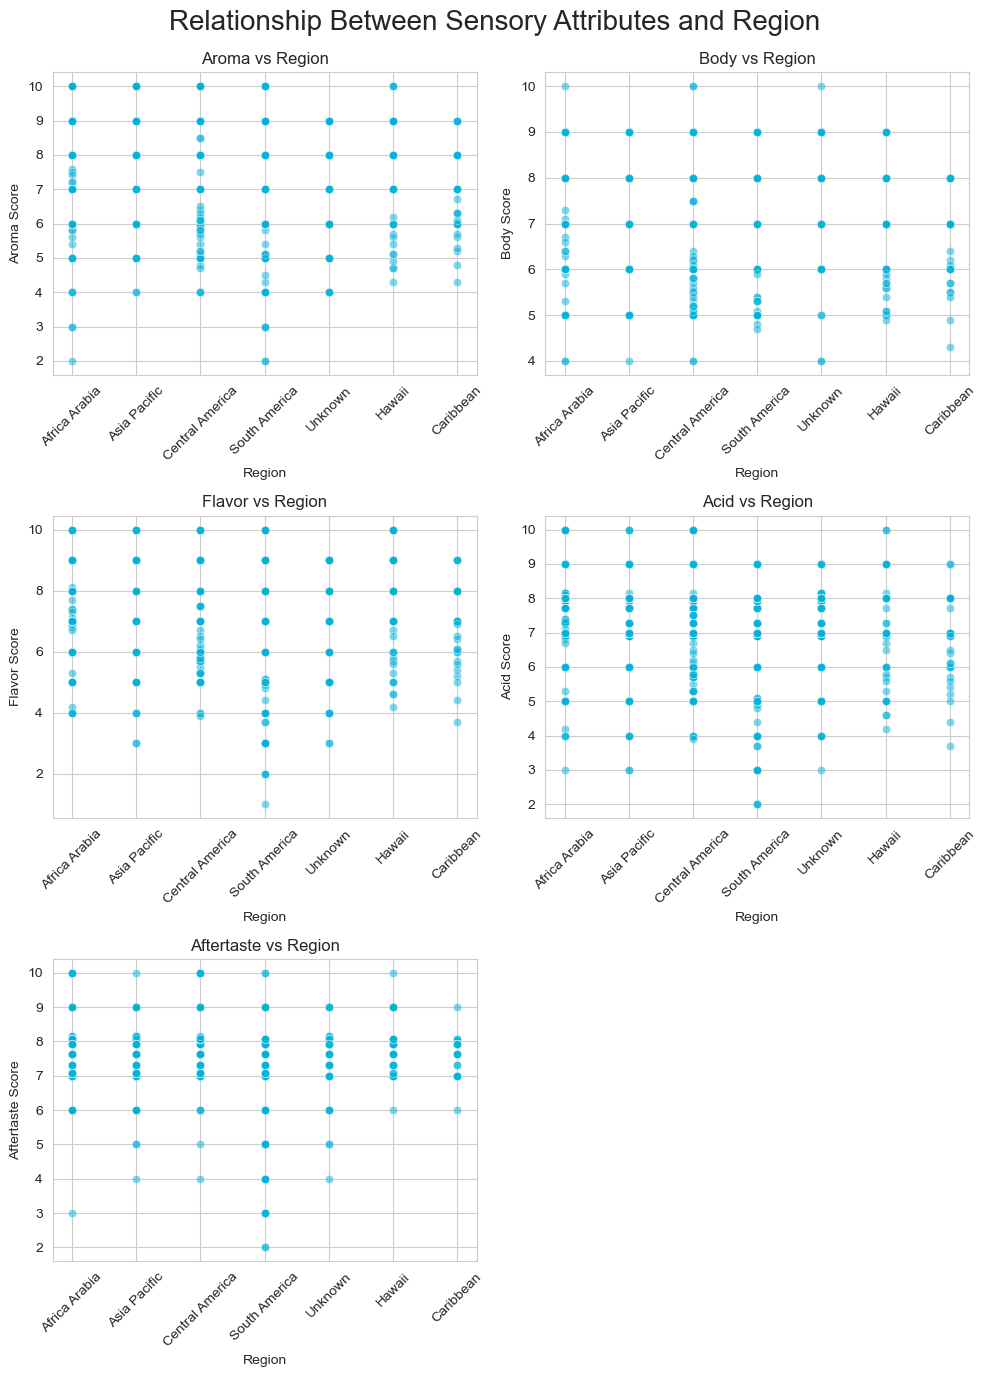

In [102]:
# Visualize the relationship between sensory attributes and region

fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.flatten()

for i, col in enumerate(sensory_cols):
    sns.scatterplot(data=df, y=col, x='region', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} vs Region')
    axes[i].set_xlabel('Region')
    axes[i].set_ylabel(f'{col.capitalize()} Score')
    axes[i].tick_params(axis='x', rotation=45)

fig.delaxes(axes[-1])

plt.suptitle('Relationship Between Sensory Attributes and Region', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()

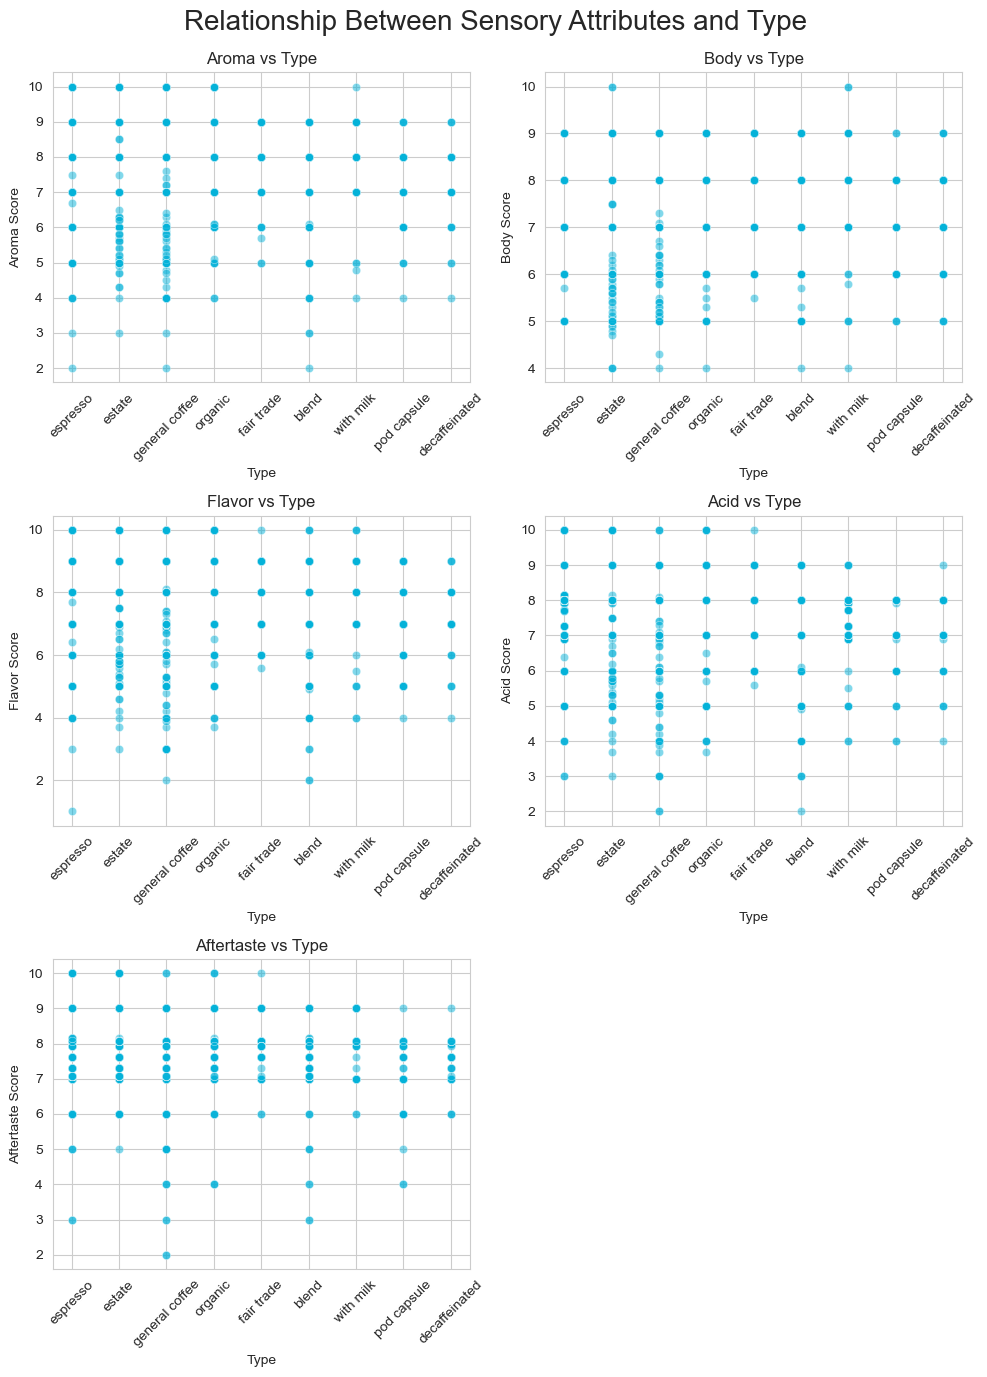

In [103]:
# Visualize the relationship between sensory attributes and type

fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.flatten()

for i, col in enumerate(sensory_cols):
    sns.scatterplot(data=df, y=col, x='type', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} vs Type')
    axes[i].set_xlabel('Type')
    axes[i].set_ylabel(f'{col.capitalize()} Score')
    axes[i].tick_params(axis='x', rotation=45)

fig.delaxes(axes[-1])

plt.suptitle('Relationship Between Sensory Attributes and Type', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()

# Feature Engineering


In [104]:
# Encodes categorical columns based on their correlation with the target variable using target encoding.

encoder = TargetEncoder(cols=['roast', 'region', 'type'])
df[['roast', 'region', 'type']] = encoder.fit_transform(df[['roast', 'region', 'type']], df['rating'])

In [105]:
# Creates interaction features by multiplying numerical and encoded categorical columns to capture combined effects.

df['flavor_x_region'] = df['flavor'] * df['region']
df['flavor_x_roast'] = df['flavor'] * df['roast']
df['acid_x_roast'] = df['acid'] * df['roast']
df['aroma_x_region'] = df['aroma'] * df['region']
df['aroma_x_roast'] = df['aroma'] * df['roast']
df['flavor_x_type'] = df['flavor'] * df['type']

In [106]:
# Applies log transformation to the 'rating' column to reduce skewness and stabilize variance.

df['rating_log'] = np.log1p(df['rating'])

In [107]:
# Defines a preprocessing pipeline to standardize selected numerical and interaction features using StandardScaler

num_cols = ['roast', 'region','type', 'flavor_x_region', 'flavor_x_roast', 'aroma_x_roast', 'aroma_x_region', 'acid_x_roast', 'flavor_x_type']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols)])

# Modeling

In [108]:
# Splits the dataset into training and testing sets for model evaluation, using log-transformed ratings as the target.

X = df[['roast', 'region', 'type','flavor_x_region', 'flavor_x_roast', 'aroma_x_roast', 'aroma_x_region', 'acid_x_roast', 'flavor_x_type']]
y = df['rating_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Builds and fits a pipeline with preprocessing and a Gradient Boosting Regressor, then evaluates performance using MSE and R-Squared on the test set.

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.002261246453263381
R-Squared: 0.9107064913193201


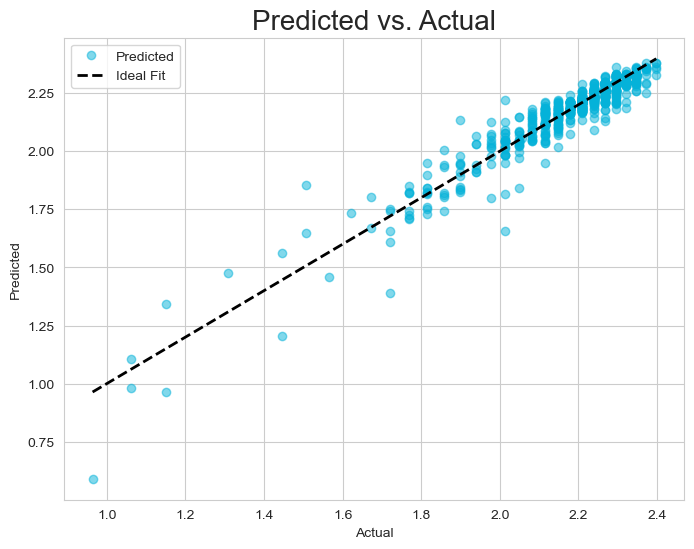

In [110]:
# Visualizes predicted vs. actual log-transformed ratings to assess model performance and alignment with the ideal fit.

plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, 'o', alpha=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual', fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

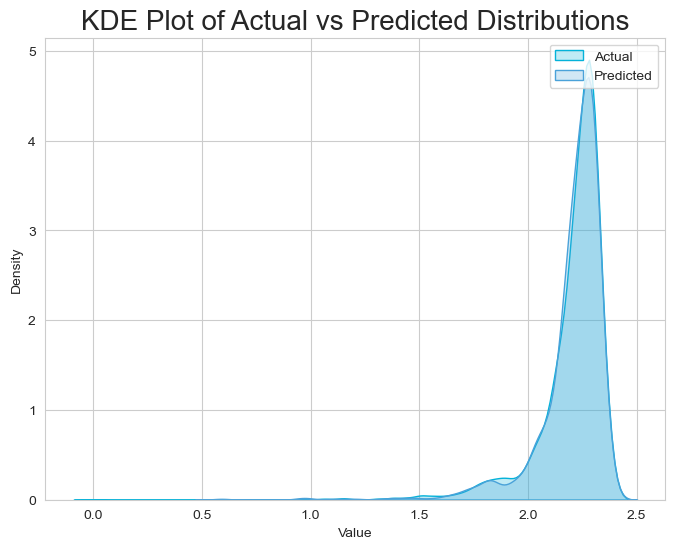

In [111]:
# Visualizes the KDE plot to compare the distributions of actual and predicted ratings.

plt.figure(figsize=(8, 6))
sns.kdeplot(y, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.title('KDE Plot of Actual vs Predicted Distributions', fontsize=20)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

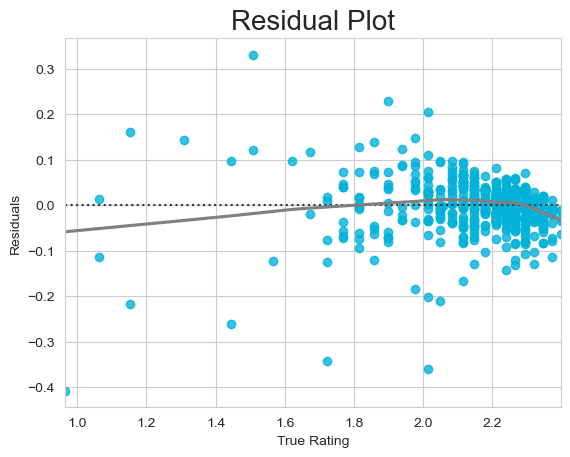

In [112]:
# Visualizes residuals to assess the difference between true and predicted ratings.

sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={"color": "grey"})
plt.xlabel("True Rating")
plt.ylabel("Residuals")
plt.title("Residual Plot", fontsize=20)
plt.show()

In [113]:
# Extracts the list of feature names from the preprocessing step in the pipeline.

preprocessor = pipeline.named_steps['preprocessing']

feature_names = preprocessor.transformers_[0][2]
feature_names

['roast',
 'region',
 'type',
 'flavor_x_region',
 'flavor_x_roast',
 'aroma_x_roast',
 'aroma_x_region',
 'acid_x_roast',
 'flavor_x_type']

In [114]:
# Extracts and ranks feature importances from the trained model.

model = pipeline.named_steps['model']

importances = model.feature_importances_

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [115]:
importance_df

,feature,importance
8,flavor_x_type,0.480867
3,flavor_x_region,0.210097
5,aroma_x_roast,0.086135
6,aroma_x_region,0.076098
7,acid_x_roast,0.063889
4,flavor_x_roast,0.060359
0,roast,0.014919
2,type,0.004841
1,region,0.002796


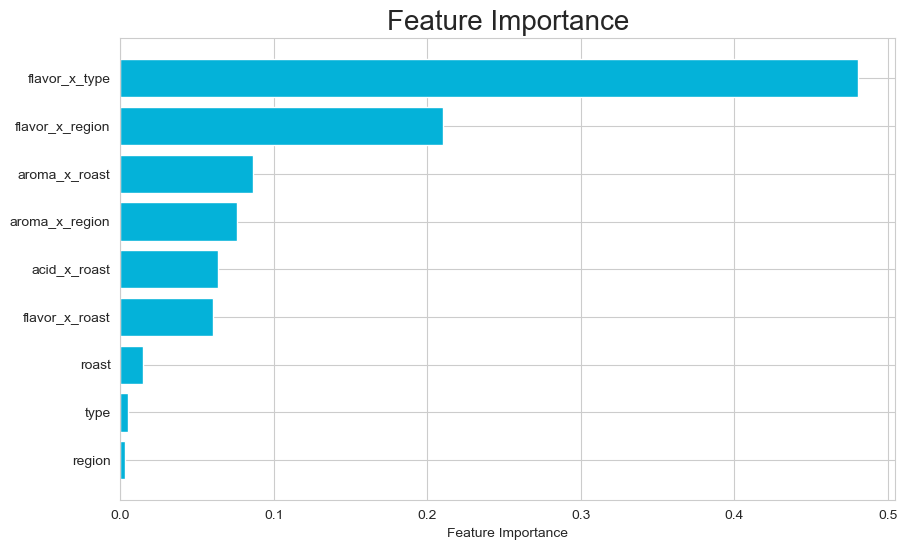

In [116]:
# Visualize feature importances, with the most important features at the top.

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance", fontsize=20)
plt.gca().invert_yaxis()
plt.show()